# Problem Statement:

Investing in Flats is the biggest investment for most households in cities like Singapore which is very small but heavily urbanised. Therefore, being able to accurately value the flat prices will not only facilitate market transactions by providing valuable guidance for all market participants (be it home owners, home buyers, landlords, tenants or banks that underwrite mortgages), but also provide useful insights for policy makers and government authorities in understanding the current state of the economy.

## Attributes:

**A**:

**B**:

**C**:

**D**:

**E**:

**F**:

**G**:

**H**:

**I**:

**J**:

**K**:

**L**:

**M**:

**N**:

**0**:

# Imports

In [1]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import pickle
import matplotlib.pyplot as plt
import missingno as msno
import graphviz
import seaborn as sns
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# Import Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import Imputer

In [3]:
# Machine Learning Imports
from mlxtend.regressor import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import pandas_profiling

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# For evaluating our ML results
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation Metric for Regression

## RMSE

In [4]:
def rmse(y,y_pred):
    rmse = sqrt(mean_squared_error(y,y_pred))
    return rmse

## MAPE

In [5]:
def mape(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

## RMSLE

In [6]:
def rmsle(y, y_pred) :
    assert len(y) == len(y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y))**2))

# Reading Data

In [7]:
df1 = pd.read_csv('train1.csv')
df1.sample(5)
#df = df.replace('?', np.nan)

month         town flat_type block        street_name storey_range  \
40181  2014-04      HOUGANG    4 ROOM   336      HOUGANG AVE 7     10 TO 12   
1086   2012-03  JURONG WEST    4 ROOM   483  JURONG WEST ST 41     11 TO 15   
15877  2012-10    PASIR RIS    4 ROOM   421     PASIR RIS DR 6     01 TO 03   
39905  2014-04  BUKIT MERAH    3 ROOM    28         JLN KLINIK     07 TO 09   
16442  2012-10    TOA PAYOH    3 ROOM     3    LOR 7 TOA PAYOH     04 TO 06   

       floor_area_sqm      flat_model  lease_commence_date  resale_price  \
40181            93.0  New Generation                 1985      410000.0   
1086             91.0  New Generation                 1985      400000.0   
15877           105.0         Model A                 1989      420000.0   
39905            67.0        Standard                 1969      422800.0   
16442            68.0        Improved                 1969      351000.0   

       uniqueID  
40181    140181  
1086     101086  
15877    115877  
39905    139905  
16442    116442

In [8]:
df1.shape

(52203, 11)

In [9]:
df2 = pd.read_csv('train2.csv')
df2.sample(5)
#df = df.replace('?', np.nan)

month        town  flat_type block       street_name storey_range  \
34263  2016-11  ANG MO KIO  EXECUTIVE   614  ANG MO KIO AVE 4     07 TO 09   
28533  2016-07    SENGKANG     4 ROOM  277D  COMPASSVALE LINK     13 TO 15   
3390   2015-03    SENGKANG     5 ROOM  321B     ANCHORVALE DR     07 TO 09   
25262  2016-05    TAMPINES     5 ROOM   932    TAMPINES ST 91     07 TO 09   
5088   2015-04    TAMPINES     5 ROOM   729    TAMPINES ST 71     04 TO 06   

       floor_area_sqm         flat_model  lease_commence_date  \
34263           149.0          Apartment                 1996   
28533            90.0  Premium Apartment                 2009   
3390            110.0           Improved                 2002   
25262           136.0            Model A                 1985   
5088            124.0           Improved                 1997   

       remaining_lease  resale_price  uniqueID  
34263               78      815000.0    186466  
28533               91      560000.0    180736  
3390                86      500000.0    155593  
25262               68      533000.0    177465  
5088                81      528000.0    157291

In [10]:
df2.columns.tolist()

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'remaining_lease',
 'resale_price',
 'uniqueID']

In [11]:
df2.shape

(37153, 12)

In [12]:
df3 = pd.read_csv('train3.csv')
df3.sample(5)
#df = df.replace('?', np.nan)

month         town flat_type block       street_name storey_range  \
12641  2017-08   QUEENSTOWN    4 ROOM    50       C'WEALTH DR     25 TO 27   
2593   2017-03  BUKIT MERAH    4 ROOM    65  TELOK BLANGAH DR     10 TO 12   
832    2017-01     SENGKANG    4 ROOM  123D      RIVERVALE DR     10 TO 12   
29255  2018-06      PUNGGOL    4 ROOM  289B        PUNGGOL PL     13 TO 15   
6310   2017-05  BUKIT MERAH    4 ROOM    52     LENGKOK BAHRU     04 TO 06   

       floor_area_sqm         flat_model  lease_commence_date  \
12641            88.0            Model A                 2015   
2593             92.0     New Generation                 1978   
832             102.0            Model A                 1999   
29255            96.0  Premium Apartment                 2013   
6310             84.0         Simplified                 1986   

          remaining_lease  resale_price  uniqueID  
12641  96 years 06 months      738000.0    201997  
2593   60 years 04 months      500000.0    191949  
832    81 years 05 months      370000.0    190188  
29255  93 years 10 months      530000.0    218611  
6310   68 years 07 months      498000.0    195666

In [13]:
df3.columns.tolist()

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date',
 'remaining_lease',
 'resale_price',
 'uniqueID']

In [14]:
df1.columns.tolist()==df2.columns.tolist()

False

In [15]:
df1.columns.tolist()==df3.columns.tolist()

False

## Pandas Profiling

In [16]:
df1.shape

(52203, 11)

In [17]:
df2.shape

(37153, 12)

In [18]:
df3.shape

(32578, 12)

In [19]:
df12=pd.concat([df1, df2])

In [20]:
df123=pd.concat([df12, df3])

In [21]:
df123.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   172        Improved    2 ROOM            45.0                 1986   
1   510        Improved    2 ROOM            44.0                 1980   
2   610  New Generation    3 ROOM            68.0                 1980   
3   474  New Generation    3 ROOM            67.0                 1984   
4   604  New Generation    3 ROOM            67.0                 1980   

     month remaining_lease  resale_price storey_range        street_name  \
0  2012-03             NaN      250000.0     06 TO 10   ANG MO KIO AVE 4   
1  2012-03             NaN      265000.0     01 TO 05   ANG MO KIO AVE 8   
2  2012-03             NaN      315000.0     06 TO 10   ANG MO KIO AVE 4   
3  2012-03             NaN      320000.0     01 TO 05  ANG MO KIO AVE 10   
4  2012-03             NaN      321000.0     06 TO 10   ANG MO KIO AVE 5   

         town  uniqueID  
0  ANG MO KIO    100000  
1  ANG MO KIO    100001  
2  ANG MO KIO    100002  
3  ANG MO KIO    100003  
4  ANG MO KIO    100004

In [22]:
df123.shape

(121934, 12)

In [23]:
df=df123.copy()

In [24]:
df.isnull().sum()

block                      0
flat_model                 0
flat_type                  0
floor_area_sqm             0
lease_commence_date        0
month                      0
remaining_lease        52203
resale_price               0
storey_range               0
street_name                0
town                       0
uniqueID                   0
dtype: int64

# Exploring Data

## Dropping Remaining Lease 

In [25]:
df.drop(['remaining_lease','uniqueID'],axis=1,inplace=True)

In [26]:
df.isnull().sum()

block                  0
flat_model             0
flat_type              0
floor_area_sqm         0
lease_commence_date    0
month                  0
resale_price           0
storey_range           0
street_name            0
town                   0
dtype: int64

In [27]:
dftest=pd.read_csv("test.csv")

In [28]:
df.columns

Index(['block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'resale_price', 'storey_range',
       'street_name', 'town'],
      dtype='object')

In [29]:
dftest.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'uniqueID'],
      dtype='object')

In [30]:
df.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
resale_price           float64
storey_range            object
street_name             object
town                    object
dtype: object

In [31]:
df.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0   172        Improved    2 ROOM            45.0                 1986   
1   510        Improved    2 ROOM            44.0                 1980   
2   610  New Generation    3 ROOM            68.0                 1980   
3   474  New Generation    3 ROOM            67.0                 1984   
4   604  New Generation    3 ROOM            67.0                 1980   

     month  resale_price storey_range        street_name        town  
0  2012-03      250000.0     06 TO 10   ANG MO KIO AVE 4  ANG MO KIO  
1  2012-03      265000.0     01 TO 05   ANG MO KIO AVE 8  ANG MO KIO  
2  2012-03      315000.0     06 TO 10   ANG MO KIO AVE 4  ANG MO KIO  
3  2012-03      320000.0     01 TO 05  ANG MO KIO AVE 10  ANG MO KIO  
4  2012-03      321000.0     06 TO 10   ANG MO KIO AVE 5  ANG MO KIO

## Check number of unique values in columns

In [32]:
df.apply(lambda x: len(x.unique()))

block                  2216
flat_model               21
flat_type                 7
floor_area_sqm          170
lease_commence_date      51
month                    77
resale_price           2965
storey_range             25
street_name             527
town                     26
dtype: int64

## Value Counts in Columns

In [33]:
for c in df.columns:
    print("---- %s ---" %c)
    print(df[c].value_counts())

---- block ---
2       501
1       436
8       393
108     392
107     388
101     383
113     377
110     366
4       364
109     362
22      351
114     348
112     338
3       336
115     330
5       328
111     324
105     324
7       318
6       312
130     310
116     308
9       307
13      304
102     303
12      298
121     298
122     298
17      294
106     294
       ... 
150A      3
230F      3
380       3
863A      3
223B      3
857B      3
499A      3
450B      3
10F       3
191B      2
178A      2
796A      2
858B      2
230E      2
645A      2
860A      2
886D      2
382       2
226E      2
42A       2
253A      2
863B      1
856E      1
905       1
430A      1
430B      1
640A      1
9B        1
10C       1
886B      1
Name: block, Length: 2216, dtype: int64
---- flat_model ---
Model A                   35539
Improved                  31362
New Generation            20579
Premium Apartment         11851
Simplified                 6387
Apartment                  5014
S

## Visualization Check

### Storey by Resale Price

In [34]:
#setting style for seaborn for better viewability
sns.set(style="whitegrid", color_codes=True)

#set up for statistical analysis
np.random.seed(sum(map(ord, "categorical")))

KeyboardInterrupt: 

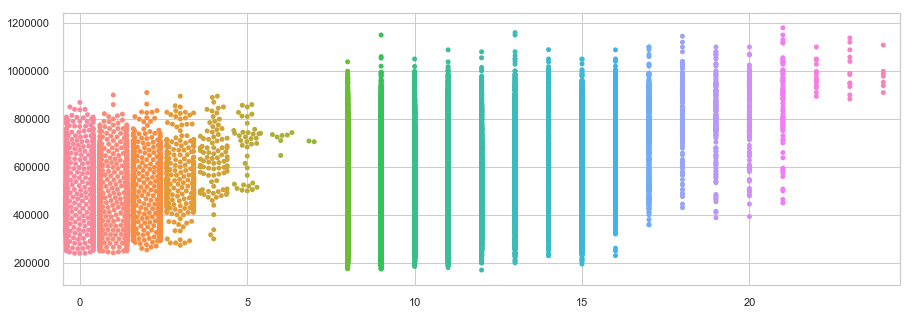

In [35]:
# f,ax=plt.subplots(figsize=(15,5))

# sns.swarmplot(x='storey_range', y='resale_price', data=df);

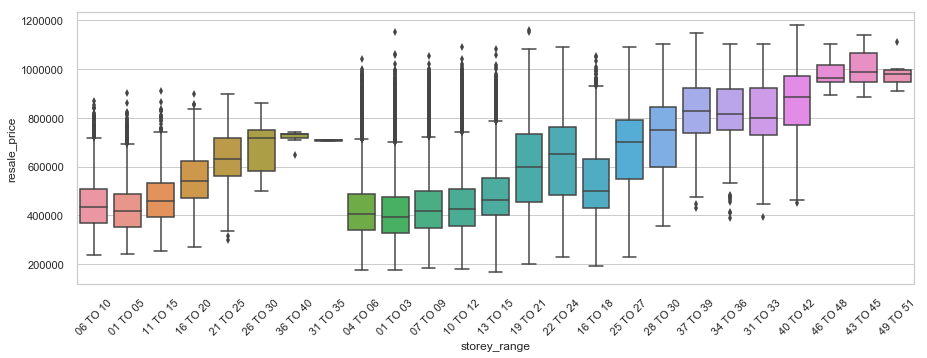

In [36]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.boxplot(x='storey_range', y='resale_price', data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

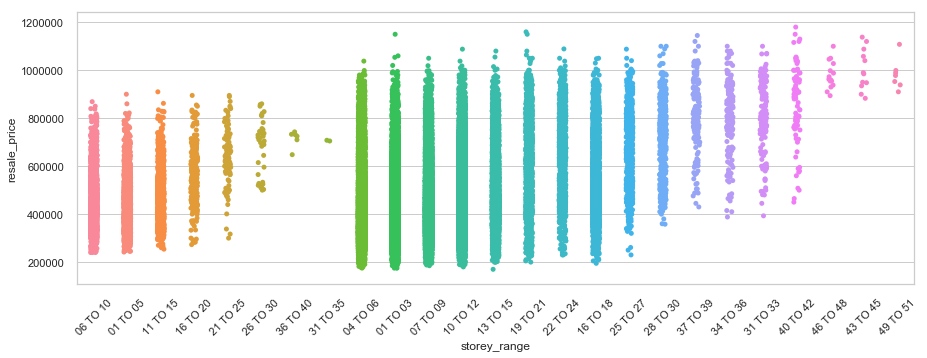

In [37]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.stripplot(x='storey_range', y='resale_price', data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

KeyboardInterrupt: 

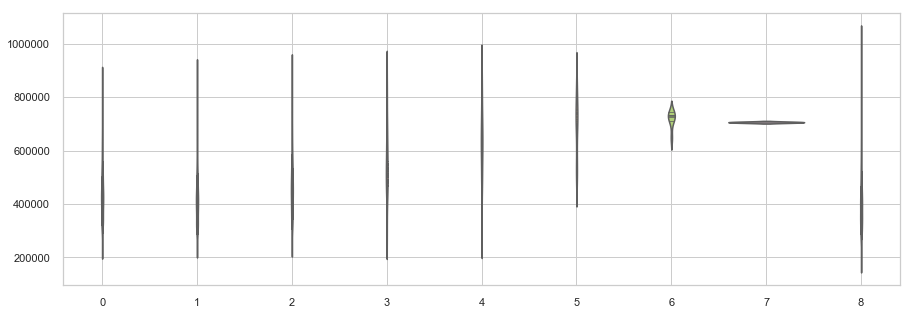

In [38]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.violinplot(x='storey_range', y='resale_price', data=df, inner="stick", palette="Set3");
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

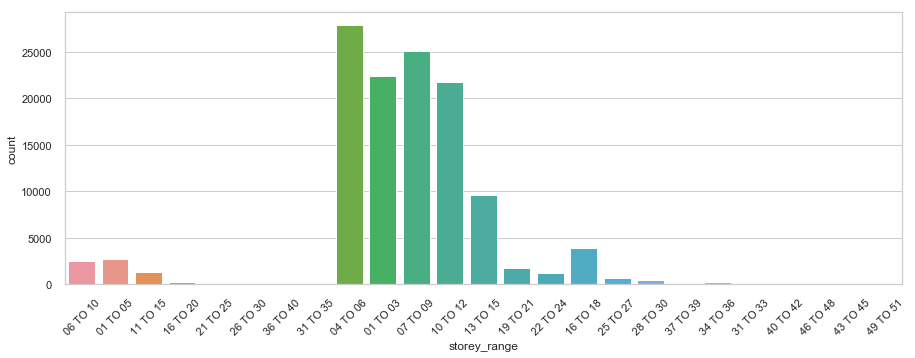

In [40]:
f,ax=plt.subplots(figsize=(15,5))

g=sns.countplot(x='storey_range', data=df);
g.set_xticklabels(g.get_xticklabels(), rotation=45);

### Storey Range by Floor Area Sqm

In [ ]:
# f,ax=plt.subplots(figsize=(15,5))

# sns.swarmplot(x='storey_range', y='floor_area_sqm', data=df);

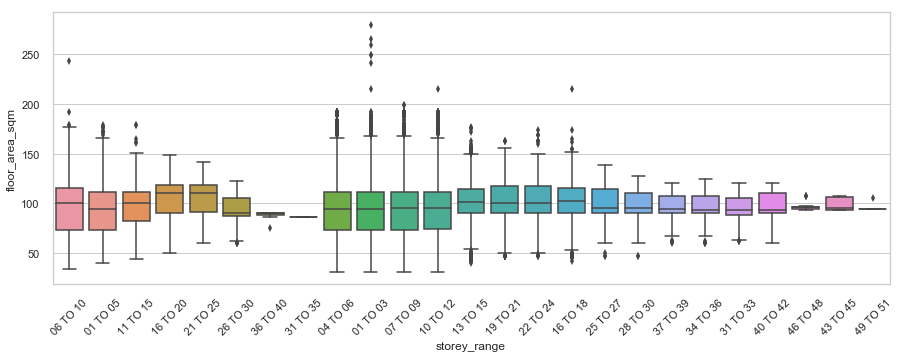

In [41]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.boxplot(x='storey_range', y='floor_area_sqm', data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

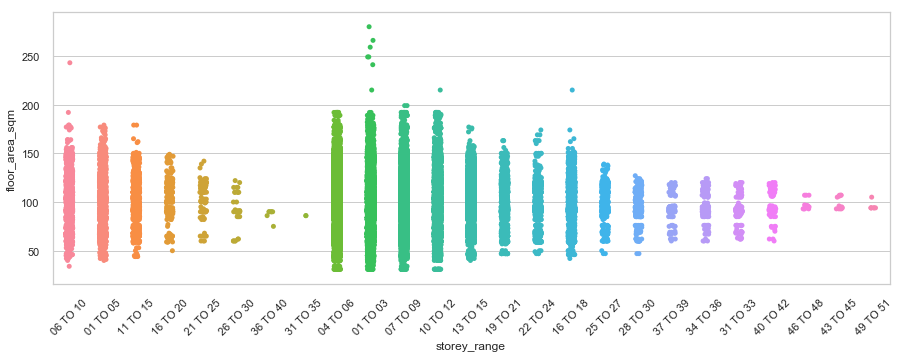

In [42]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.stripplot(x='storey_range', y='floor_area_sqm', data=df)
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [ ]:
# f,ax=plt.subplots(figsize=(15,5))

# g=sns.violinplot(x='storey_range', y='floor_area_sqm', data=df, inner="stick", palette="Set3");
# g.set_xticklabels(g.get_xticklabels(), rotation=45);

# Feature Engineering

## Taking out Year and Month from Month Column

In [43]:
df["year"]=df["month"].str.split("-",expand=True)[0]

In [44]:
df["month"]=df["month"].str.split("-",expand=True)[1]

In [45]:
df.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date month  \
0   172        Improved    2 ROOM            45.0                 1986    03   
1   510        Improved    2 ROOM            44.0                 1980    03   
2   610  New Generation    3 ROOM            68.0                 1980    03   
3   474  New Generation    3 ROOM            67.0                 1984    03   
4   604  New Generation    3 ROOM            67.0                 1980    03   

   resale_price storey_range        street_name        town  year  
0      250000.0     06 TO 10   ANG MO KIO AVE 4  ANG MO KIO  2012  
1      265000.0     01 TO 05   ANG MO KIO AVE 8  ANG MO KIO  2012  
2      315000.0     06 TO 10   ANG MO KIO AVE 4  ANG MO KIO  2012  
3      320000.0     01 TO 05  ANG MO KIO AVE 10  ANG MO KIO  2012  
4      321000.0     06 TO 10   ANG MO KIO AVE 5  ANG MO KIO  2012

## Taking out Storey Range Col1 and Col2

In [46]:
df["storey_range_1"]=df["storey_range"].str.split("TO",expand=True)[0]

In [47]:
df["storey_range_2"]=df["storey_range"].str.split("TO",expand=True)[1]

In [48]:
df.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date month  \
0   172        Improved    2 ROOM            45.0                 1986    03   
1   510        Improved    2 ROOM            44.0                 1980    03   
2   610  New Generation    3 ROOM            68.0                 1980    03   
3   474  New Generation    3 ROOM            67.0                 1984    03   
4   604  New Generation    3 ROOM            67.0                 1980    03   

   resale_price storey_range        street_name        town  year  \
0      250000.0     06 TO 10   ANG MO KIO AVE 4  ANG MO KIO  2012   
1      265000.0     01 TO 05   ANG MO KIO AVE 8  ANG MO KIO  2012   
2      315000.0     06 TO 10   ANG MO KIO AVE 4  ANG MO KIO  2012   
3      320000.0     01 TO 05  ANG MO KIO AVE 10  ANG MO KIO  2012   
4      321000.0     06 TO 10   ANG MO KIO AVE 5  ANG MO KIO  2012   

  storey_range_1 storey_range_2  
0            06              10  
1            01              05  
2            06              10  
3            01              05  
4            06              10

In [49]:
df.drop("storey_range",axis=1,inplace=True)

In [158]:
df['town'].value_counts()

JURONG WEST        9807
WOODLANDS          9503
TAMPINES           8570
SENGKANG           8151
YISHUN             7664
BEDOK              7656
HOUGANG            6136
ANG MO KIO         5927
PUNGGOL            5202
CHOA CHU KANG      5136
BUKIT BATOK        4857
BUKIT MERAH        4808
BUKIT PANJANG      4251
TOA PAYOH          3997
PASIR RIS          3938
KALLANG/WHAMPOA    3723
GEYLANG            3369
QUEENSTOWN         3312
SEMBAWANG          3074
CLEMENTI           2958
JURONG EAST        2815
SERANGOON          2657
BISHAN             2289
CENTRAL AREA       1021
MARINE PARADE       829
BUKIT TIMAH         284
Name: town, dtype: int64

In [159]:
low_pop=["CENTRAL AREA","MARINE PARADE","BUKIT TIMAH","BISHAN","SEMBAWANG","CLEMENTI","SERANGOON","JURONG EAST","QUEENSTOWN","GEYLANG","PUNGGOL"]
med_pop=["KALLANG/WHAMPOA","TOA PAYOH","PASIR RIS","BUKIT BATOK","BUKIT PANJANG","BUKIT MERAH","ANG MO KIO"]
high_pop=["CHOA CHU KANG","HOUGANG","SENGKANG","YISHUN","BEDOK","TAMPINES","WOODLANDS","JURONG WEST"]

In [160]:
city=["BISHAN","SEMBAWANG","CLEMENTI","SERANGOON","JURONG EAST","QUEENSTOWN","GEYLANG","PUNGGOL","KALLANG/WHAMPOA","TOA PAYOH","PASIR RIS","BUKIT BATOK","BUKIT PANJANG","BUKIT MERAH","ANG MO KIO","CHOA CHU KANG","HOUGANG","SENGKANG","YISHUN","BEDOK","TAMPINES","WOODLANDS","JURONG WEST"]

CENTRAL AREA,MARINE PARADE,BUKIT TIMAH 

In [164]:
d = {"CENTRAL AREA":0,"MARINE PARADE":1,"BUKIT TIMAH":2,"BISHAN":3,"SEMBAWANG":4,"CLEMENTI":5,"SERANGOON":6, "JURONG EAST":7,"QUEENSTOWN":8,"GEYLANG":9,"PUNGGOL":10,
    "KALLANG/WHAMPOA":11,"TOA PAYOH":12,"PASIR RIS":13,"BUKIT BATOK":14,"BUKIT PANJANG":15,"BUKIT MERAH":16,"ANG MO KIO":17,
    "CHOA CHU KANG":18,"HOUGANG":19,"SENGKANG":20,"YISHUN":21,"BEDOK":22,"TAMPINES":23,"WOODLANDS":24,"JURONG WEST":24}

In [165]:
df['pop_check'] = df['town'].map(d)

In [166]:
def pop_check(row):
    if(row>=0 and row<=11):
        return 'low population'
    elif(row>=12 and row<=17):
        return 'medium population'
    else:
        return 'high population'

df['pop_check']=df['pop_check'].apply(pop_check)

In [167]:
df.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date  month  \
0   172        Improved    2 ROOM            45.0                 1986      3   
1   510        Improved    2 ROOM            44.0                 1980      3   
2   610  New Generation    3 ROOM            68.0                 1980      3   
3   474  New Generation    3 ROOM            67.0                 1984      3   
4   604  New Generation    3 ROOM            67.0                 1980      3   

   resale_price        street_name        town  year storey_range_1  \
0      250000.0   ANG MO KIO AVE 4  ANG MO KIO  2012            06    
1      265000.0   ANG MO KIO AVE 8  ANG MO KIO  2012            01    
2      315000.0   ANG MO KIO AVE 4  ANG MO KIO  2012            06    
3      320000.0  ANG MO KIO AVE 10  ANG MO KIO  2012            01    
4      321000.0   ANG MO KIO AVE 5  ANG MO KIO  2012            06    

  storey_range_2          pop_check  
0             10  medium population  
1             05  medium population  
2             10  medium population  
3             05  medium population  
4             10  medium population

In [169]:
df['pop_check'].unique()

array(['medium population', 'high population', 'low population'],
      dtype=object)

In [170]:
df.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date  month  \
0   172        Improved    2 ROOM            45.0                 1986      3   
1   510        Improved    2 ROOM            44.0                 1980      3   
2   610  New Generation    3 ROOM            68.0                 1980      3   
3   474  New Generation    3 ROOM            67.0                 1984      3   
4   604  New Generation    3 ROOM            67.0                 1980      3   

   resale_price        street_name        town  year storey_range_1  \
0      250000.0   ANG MO KIO AVE 4  ANG MO KIO  2012            06    
1      265000.0   ANG MO KIO AVE 8  ANG MO KIO  2012            01    
2      315000.0   ANG MO KIO AVE 4  ANG MO KIO  2012            06    
3      320000.0  ANG MO KIO AVE 10  ANG MO KIO  2012            01    
4      321000.0   ANG MO KIO AVE 5  ANG MO KIO  2012            06    

  storey_range_2          pop_check  
0             10  medium population  
1             05  medium population  
2             10  medium population  
3             05  medium population  
4             10  medium population

In [86]:
df.dtypes

block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
resale_price           float64
street_name             object
town                    object
year                    object
storey_range_1          object
storey_range_2          object
dtype: object

In [93]:
col_o = df.select_dtypes(include=['object']).columns.tolist()

In [94]:
col_o

['block',
 'flat_model',
 'flat_type',
 'month',
 'street_name',
 'town',
 'year',
 'storey_range_1',
 'storey_range_2']

In [95]:
df[col_o]=df[col_o].astype('category')

In [96]:
df.dtypes

block                  category
flat_model             category
flat_type              category
floor_area_sqm          float64
lease_commence_date       int64
month                  category
resale_price            float64
street_name            category
town                   category
year                   category
storey_range_1         category
storey_range_2         category
dtype: object

In [97]:
col_my=["month","year"]

In [98]:
df[col_my]=df[col_my].astype('int64')

In [99]:
df.dtypes

block                  category
flat_model             category
flat_type              category
floor_area_sqm          float64
lease_commence_date       int64
month                     int64
resale_price            float64
street_name            category
town                   category
year                      int64
storey_range_1         category
storey_range_2         category
dtype: object

In [85]:
# df.drop('population',axis=1,inplace=True)

# Data Visualization

In [34]:
sns.set_context("poster")

## Wide form Check

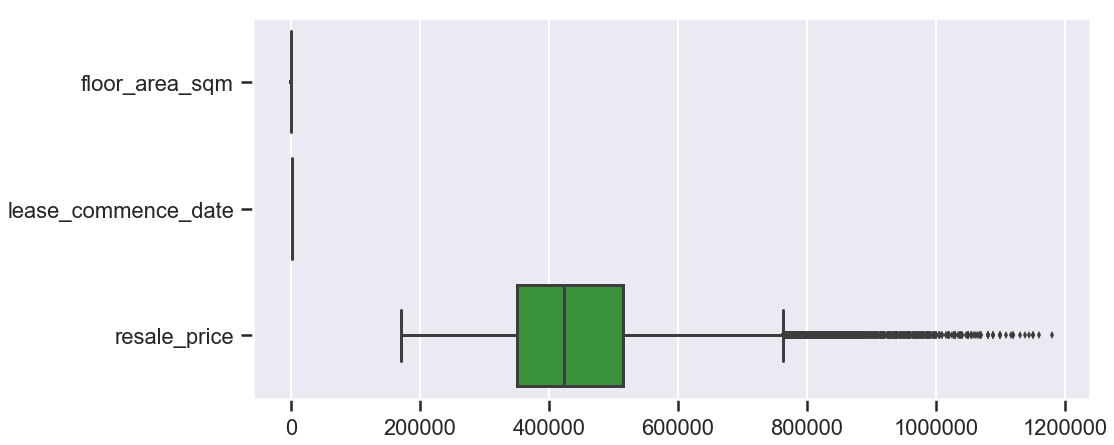

In [35]:
f,ax=plt.subplots(figsize=(15,7))

sns.boxplot(data=df, orient="h");

## Count of Flat Model

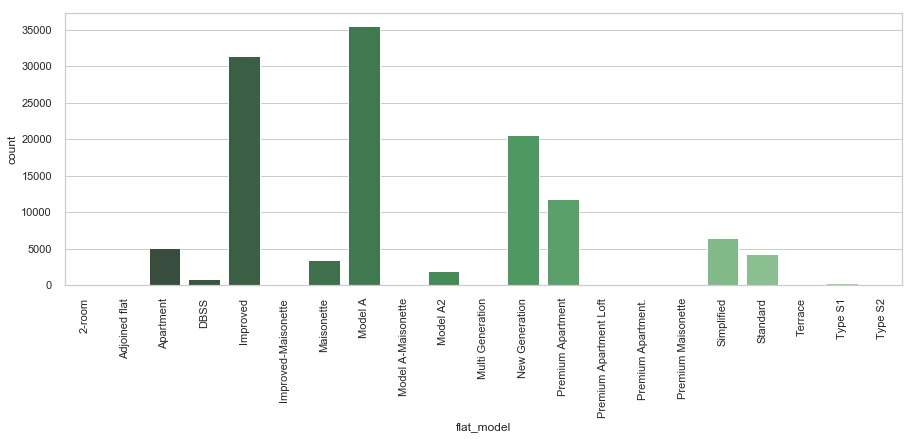

In [109]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='flat_model', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Count of Flat Types

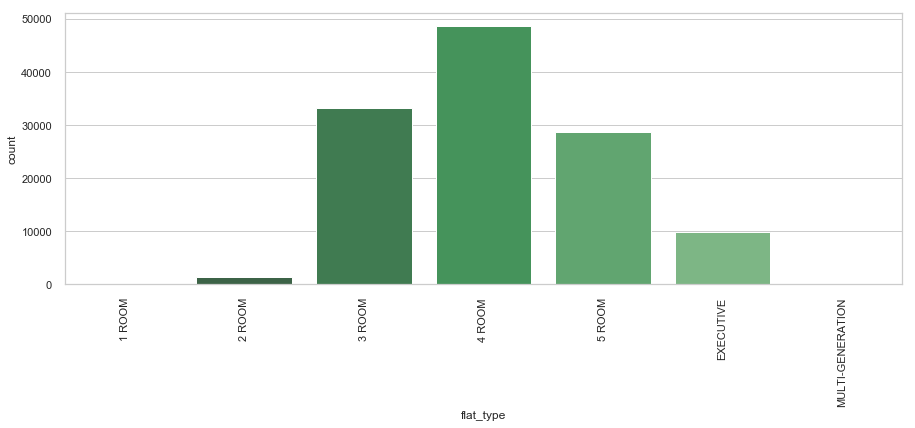

In [110]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='flat_type', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Count of Sales by Year

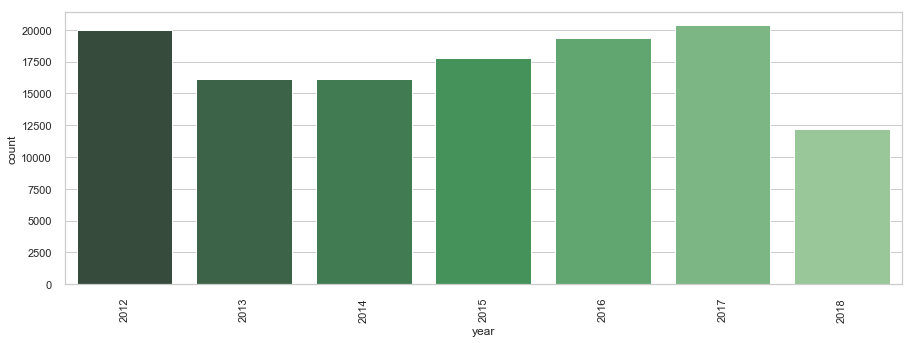

In [111]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='year', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Count of Sales by Month

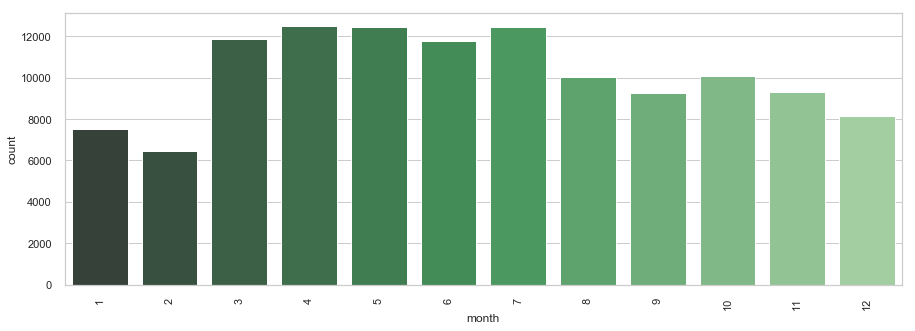

In [113]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='month', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Dubious Visualization

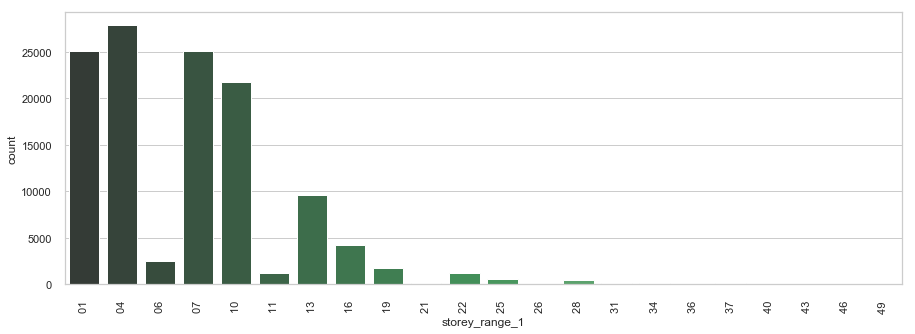

In [114]:
## Count of Sales by Year

f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='storey_range_1', data=df, palette="Greens_d")
plt.xticks(rotation=90);

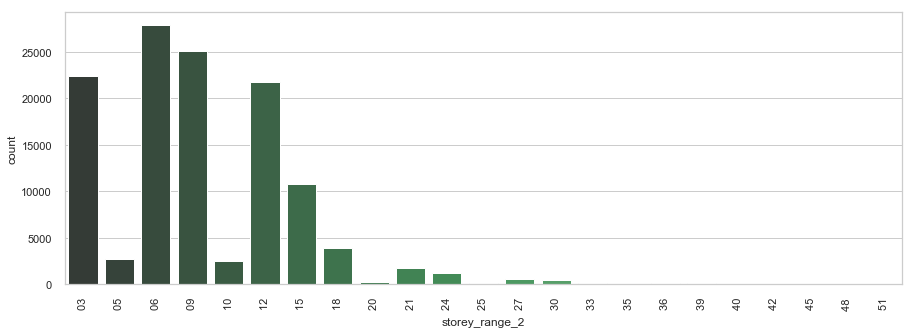

In [115]:
## Count of Sales by Year

f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='storey_range_2', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Count of Towns in the Dataset

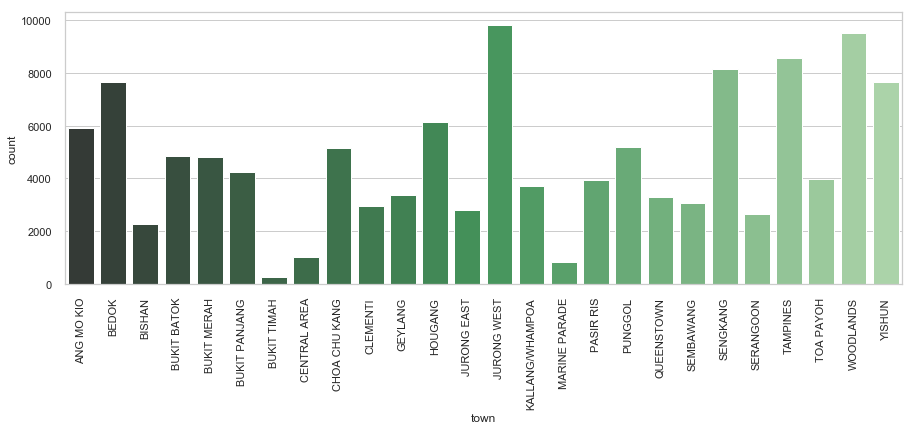

In [112]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='town', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## Population Wise Resale Price

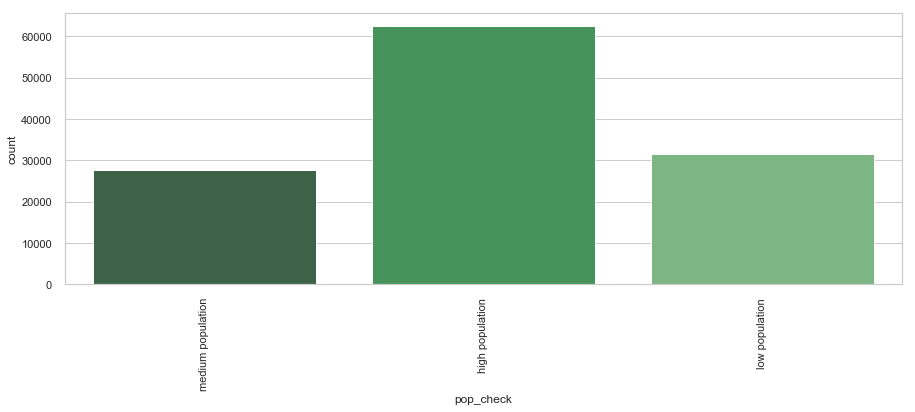

In [171]:
f,ax=plt.subplots(figsize=(15,5))

sns.countplot(x='pop_check', data=df, palette="Greens_d")
plt.xticks(rotation=90);

## CrossTab

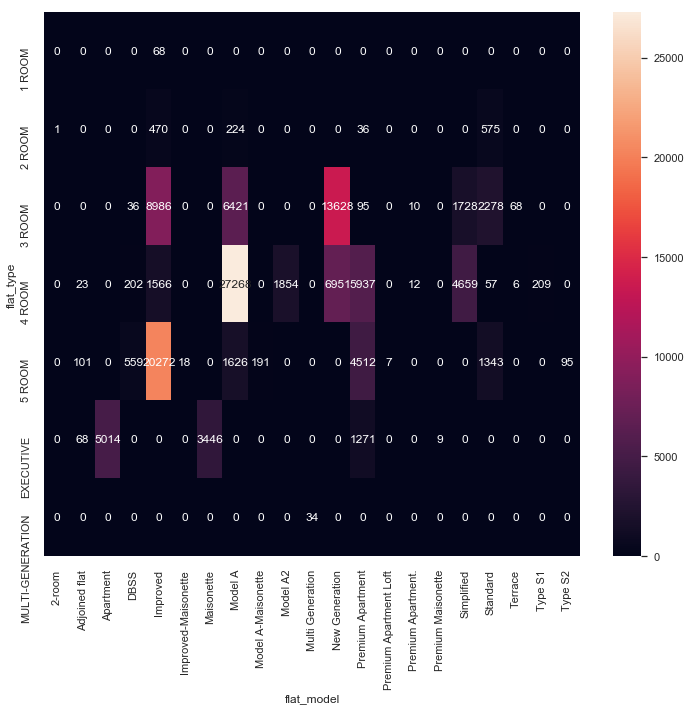

In [122]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(df['flat_type'], df['flat_model']),annot=True,fmt='d');

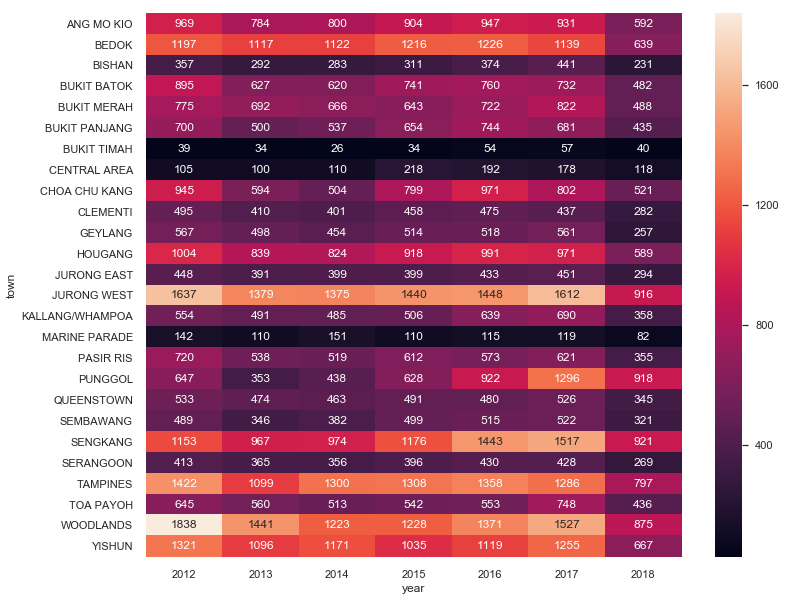

In [123]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(df['town'], df['year']),annot=True,fmt='d');

## YearWise Resale Price by Flat Type

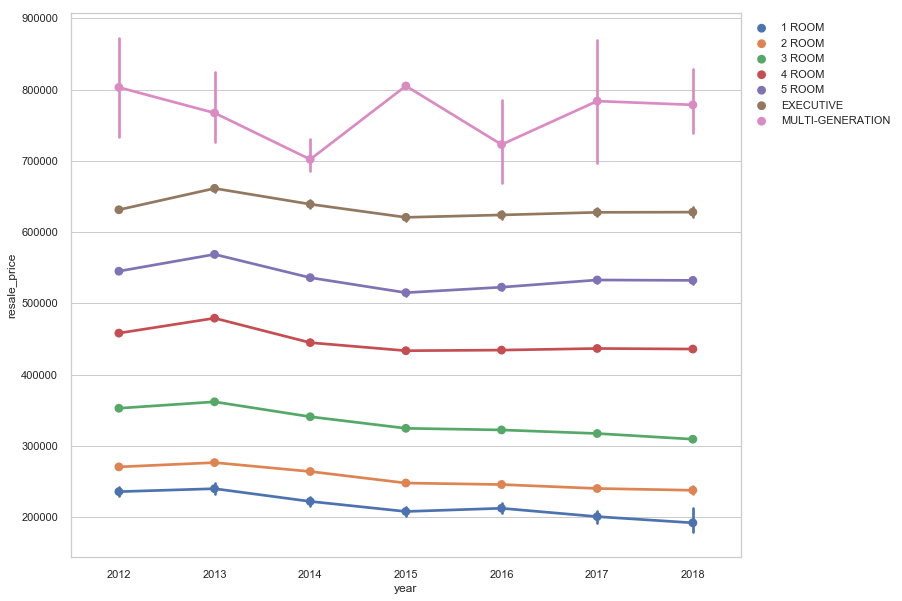

In [129]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.pointplot(x='year', y='resale_price', data=df,hue="flat_type")
plt.legend(bbox_to_anchor=(1,1));

##  YearWise Floor Area Square Metre by Flat Type

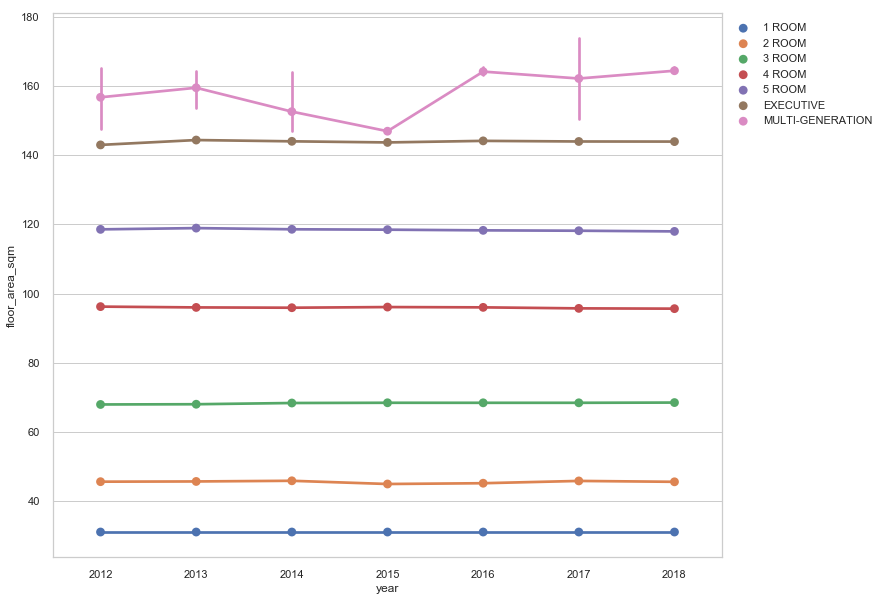

In [131]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.pointplot(x='year', y='floor_area_sqm', data=df,hue="flat_type")
plt.legend(bbox_to_anchor=(1,1));

## Floor Area Square Metre by Resale Price

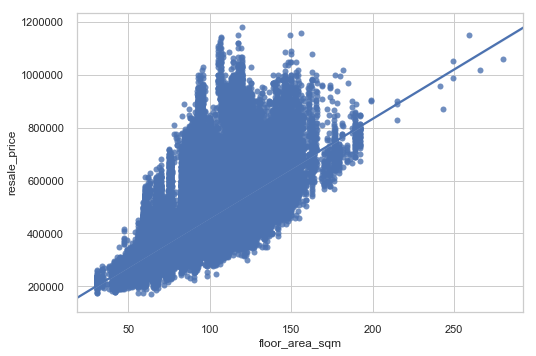

In [137]:
sns.regplot(x='floor_area_sqm', y='resale_price', data=df);

## Floor Area Square Metre by Resale Price with Means in more general terms

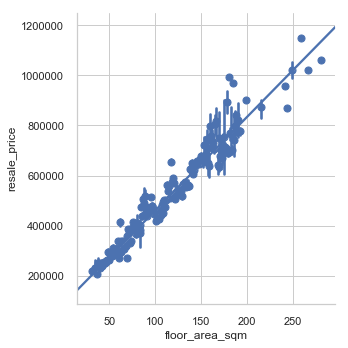

In [138]:
#Collapsing the data points in each bin and plotting the central tendency
sns.lmplot(x='floor_area_sqm', y='resale_price', data=df, x_estimator=np.mean);

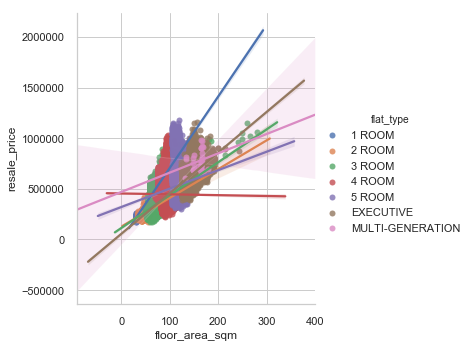

In [141]:
#Collapsing the data points in each bin and plotting the central tendency
sns.lmplot(x='floor_area_sqm', y='resale_price', data=df, hue="flat_type");

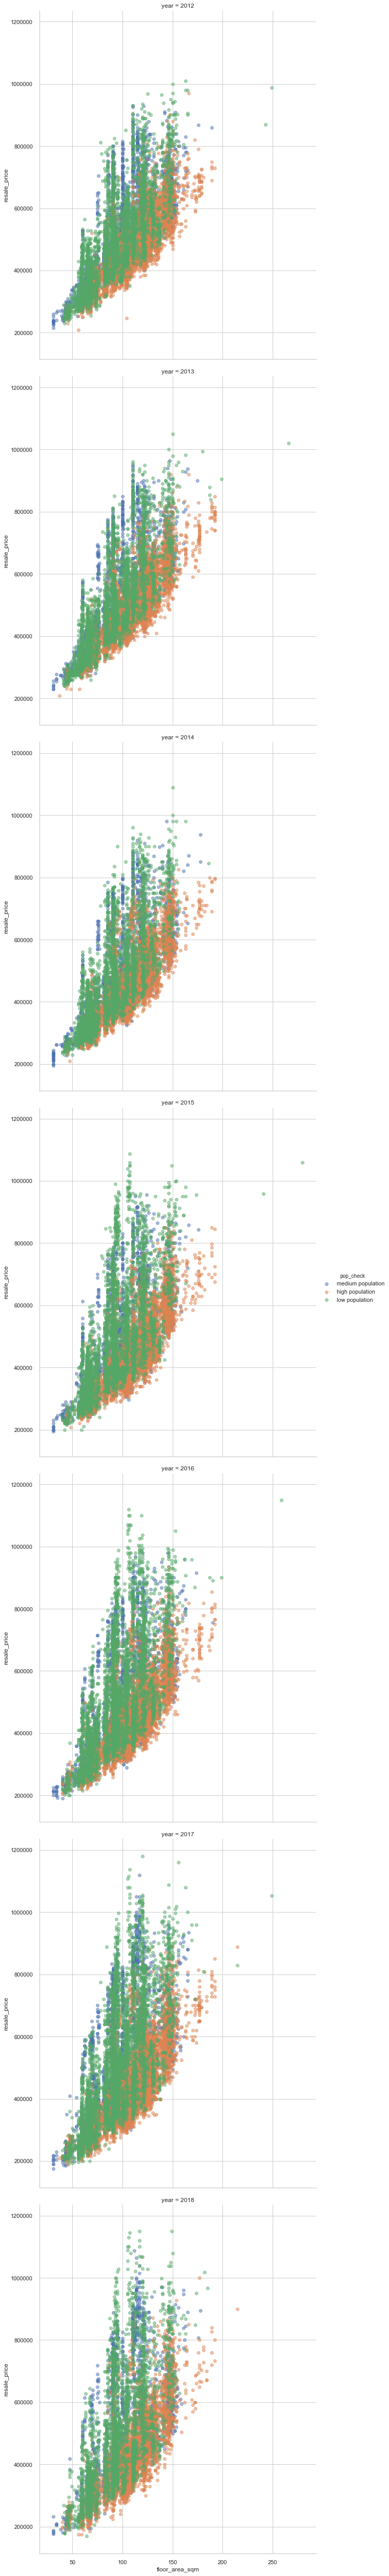

In [175]:
g=sns.FacetGrid(df,col="year",hue="pop_check",col_wrap=1,size=10, aspect=0.9)
g.map(plt.scatter,"floor_area_sqm","resale_price",alpha=0.5)
g.add_legend();

## 

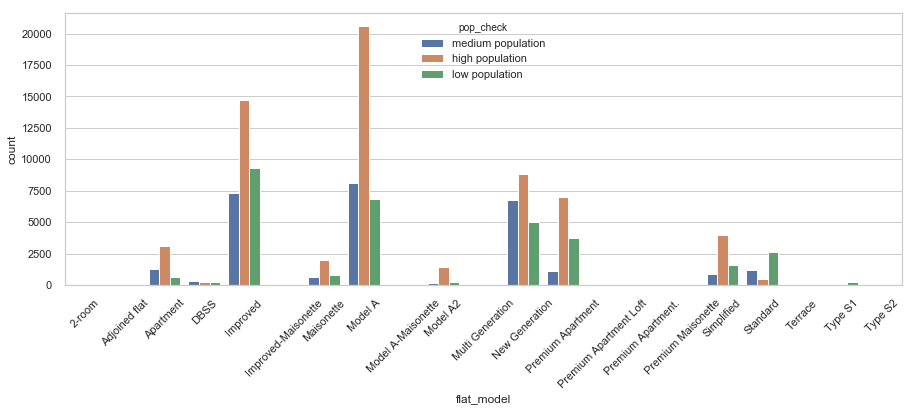

In [177]:
plt.figure(figsize=(15, 5))
sns.countplot(x='flat_model', data = df, hue = 'pop_check');
plt.xticks(rotation=45);

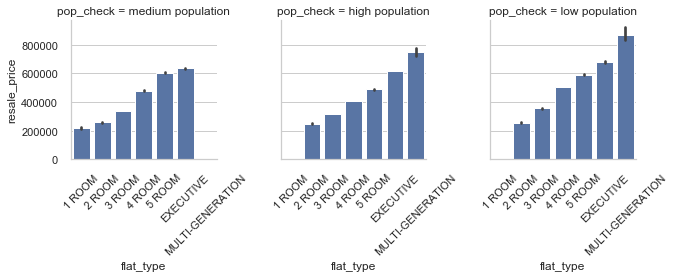

In [204]:
g=sns.FacetGrid(df, col="pop_check", col_wrap=4)# colwrap if too many columns
g.map(sns.barplot,"flat_type", "resale_price");
g.set_axis_labels("flat_type", "resale_price");
g.set_xticklabels(rotation=45);

## Corr Plot

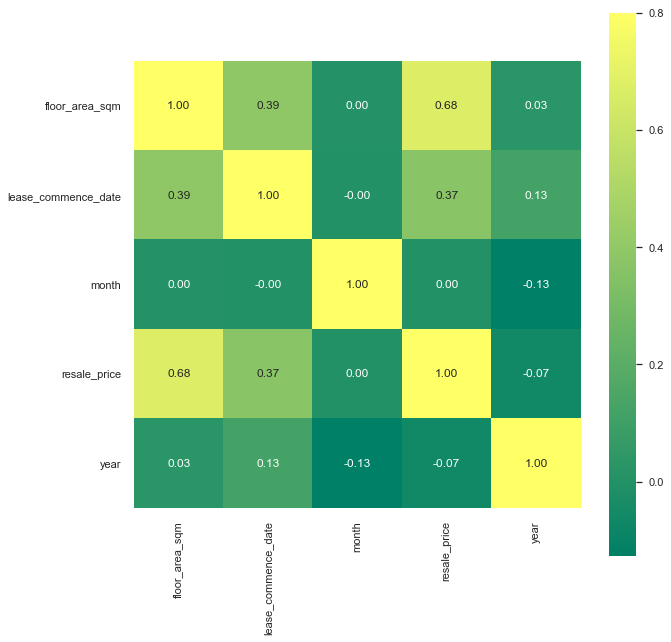

In [241]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")#cmap ="winter"
plt.show();

In [196]:
df.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date  month  \
0   172        Improved    2 ROOM            45.0                 1986      3   
1   510        Improved    2 ROOM            44.0                 1980      3   
2   610  New Generation    3 ROOM            68.0                 1980      3   
3   474  New Generation    3 ROOM            67.0                 1984      3   
4   604  New Generation    3 ROOM            67.0                 1980      3   

   resale_price        street_name        town  year storey_range_1  \
0      250000.0   ANG MO KIO AVE 4  ANG MO KIO  2012            06    
1      265000.0   ANG MO KIO AVE 8  ANG MO KIO  2012            01    
2      315000.0   ANG MO KIO AVE 4  ANG MO KIO  2012            06    
3      320000.0  ANG MO KIO AVE 10  ANG MO KIO  2012            01    
4      321000.0   ANG MO KIO AVE 5  ANG MO KIO  2012            06    

  storey_range_2          pop_check  
0             10  medium population  
1             05  medium population  
2             10  medium population  
3             05  medium population  
4             10  medium population

In [197]:
df.dtypes

block                  category
flat_model             category
flat_type              category
floor_area_sqm          float64
lease_commence_date       int64
month                     int64
resale_price            float64
street_name            category
town                   category
year                      int64
storey_range_1         category
storey_range_2         category
pop_check                object
dtype: object

In [ ]:
df

# Preprocessing

In [232]:
X=df.drop("resale_price",axis=1)
y=df["resale_price"]

In [233]:
X.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date  month  \
0   172        Improved    2 ROOM            45.0                 1986      3   
1   510        Improved    2 ROOM            44.0                 1980      3   
2   610  New Generation    3 ROOM            68.0                 1980      3   
3   474  New Generation    3 ROOM            67.0                 1984      3   
4   604  New Generation    3 ROOM            67.0                 1980      3   

         street_name        town  year storey_range_1 storey_range_2  \
0   ANG MO KIO AVE 4  ANG MO KIO  2012            06              10   
1   ANG MO KIO AVE 8  ANG MO KIO  2012            01              05   
2   ANG MO KIO AVE 4  ANG MO KIO  2012            06              10   
3  ANG MO KIO AVE 10  ANG MO KIO  2012            01              05   
4   ANG MO KIO AVE 5  ANG MO KIO  2012            06              10   

           pop_check  
0  medium population  
1  medium population  
2  medium population  
3  medium population  
4  medium population

In [234]:
y.head()

0    250000.0
1    265000.0
2    315000.0
3    320000.0
4    321000.0
Name: resale_price, dtype: float64

In [235]:
labcols=["block","street_name","pop_check"]

In [236]:
ohecols=["flat_model","flat_type","lease_commence_date","month","town","year","storey_range_1","storey_range_2"]

## LabelEncoding

In [237]:
le=LabelEncoder()
X[labcols]=X[labcols].apply(LabelEncoder().fit_transform)

In [238]:
X.head()

block      flat_model flat_type  floor_area_sqm  lease_commence_date  \
0    226        Improved    2 ROOM            45.0                 1986   
1   1268        Improved    2 ROOM            44.0                 1980   
2   1420  New Generation    3 ROOM            68.0                 1980   
3   1128  New Generation    3 ROOM            67.0                 1984   
4   1410  New Generation    3 ROOM            67.0                 1980   

   month  street_name        town  year storey_range_1 storey_range_2  \
0      3           13  ANG MO KIO  2012            06              10   
1      3           16  ANG MO KIO  2012            01              05   
2      3           13  ANG MO KIO  2012            06              10   
3      3           10  ANG MO KIO  2012            01              05   
4      3           14  ANG MO KIO  2012            06              10   

   pop_check  
0          2  
1          2  
2          2  
3          2  
4          2

## One Hot Encoding

In [239]:
X = pd.get_dummies(columns = ohecols, data = X, drop_first=True)

In [240]:
X.head()

block  floor_area_sqm  street_name  pop_check  flat_model_Adjoined flat  \
0    226            45.0           13          2                         0   
1   1268            44.0           16          2                         0   
2   1420            68.0           13          2                         0   
3   1128            67.0           10          2                         0   
4   1410            67.0           14          2                         0   

   flat_model_Apartment  flat_model_DBSS  flat_model_Improved  \
0                     0                0                    1   
1                     0                0                    1   
2                     0                0                    0   
3                     0                0                    0   
4                     0                0                    0   

   flat_model_Improved-Maisonette  flat_model_Maisonette  ...  \
0                               0                      0  ...   
1                               0                      0  ...   
2                               0                      0  ...   
3                               0                      0  ...   
4                               0                      0  ...   

   storey_range_2_ 30  storey_range_2_ 33  storey_range_2_ 35  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   storey_range_2_ 36  storey_range_2_ 39  storey_range_2_ 40  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   storey_range_2_ 42  storey_range_2_ 45  storey_range_2_ 48  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   storey_range_2_ 51  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 165 columns]

In [242]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Modeling

## Linear Regression

In [243]:
# Fitting Linear Regression to the Training set
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
# Save to file 
pkl_filename = "lr_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [245]:
# Predicting the Train and Test set results
y_pred_lr_train= lr.predict(X_train)
y_pred_lr_test= lr.predict(X_test)

In [246]:
predictors = X_train.columns
coef = pd.Series(lr.coef_, predictors).sort_values()
print(coef)

town_SEMBAWANG                  -134569.944396
town_BUKIT PANJANG              -110017.202607
lease_commence_date_1967         -97298.687385
town_CHOA CHU KANG               -96256.476855
town_PUNGGOL                     -87315.758664
town_PASIR RIS                   -81958.989283
town_SENGKANG                    -80731.489044
lease_commence_date_1969         -80370.820683
lease_commence_date_1971         -77933.686445
lease_commence_date_1970         -77544.397018
town_BUKIT BATOK                 -76370.761225
town_WOODLANDS                   -73804.408730
flat_model_Model A               -66773.894272
flat_model_Improved              -65961.365985
flat_model_Premium Apartment     -65153.703875
flat_model_Simplified            -64853.926019
lease_commence_date_1968         -63886.256340
flat_model_New Generation        -63081.718279
town_JURONG WEST                 -58856.038097
flat_model_Model A2              -57953.696361
lease_commence_date_1973         -57345.119018
year_2018    

In [247]:
#Score of Prediction
lr_r2score_train = lr.score(X_train,y_train)
print("Train Prediction R2 Score",lr_r2score_train*100)
lr_r2score_test = r2_score(y_test,y_pred_lr_test)
print("Test Prediction R2 Score",lr_r2score_test*100)

lr_score_train_rmse = rmse(y_train,y_pred_lr_train)
print("Train Prediction RMSE Score",lr_score_train_rmse)
lr_score_test_rmse = rmse(y_test,y_pred_lr_test)
print("Test Prediction RMSE Score",lr_score_test_rmse)

lr_score_train_mape = mape(y_train,y_pred_lr_train)
print("Train Prediction MAPE Score",lr_score_train_mape)
lr_score_test_mape = mape(y_test,y_pred_lr_test)
print("Test Prediction MAPE Score",lr_score_test_mape)

lr_score_train_rmsle = rmsle(y_train,y_pred_lr_train)
print("Train Prediction RMSLE Score",lr_score_train_rmsle)
lr_score_test_rmsle = rmsle(y_test,y_pred_lr_test)
print("Test Prediction RMSLE Score",lr_score_test_rmsle)

Train Prediction R2 Score 87.36983697031711
Test Prediction R2 Score 87.34590509093584
Train Prediction RMSE Score 48201.15383251777
Test Prediction RMSE Score 48412.441992136046
Train Prediction MAPE Score 8.257608080779715
Test Prediction MAPE Score 8.343399701822142
Train Prediction RMSLE Score 0.10691634492422837
Test Prediction RMSLE Score 0.1075193943639548


### Train Actual vs Prediction Plot

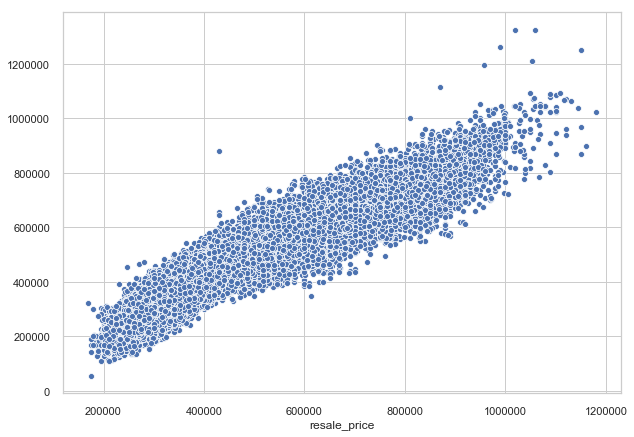

In [248]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x =y_train, y = y_pred_lr_train);

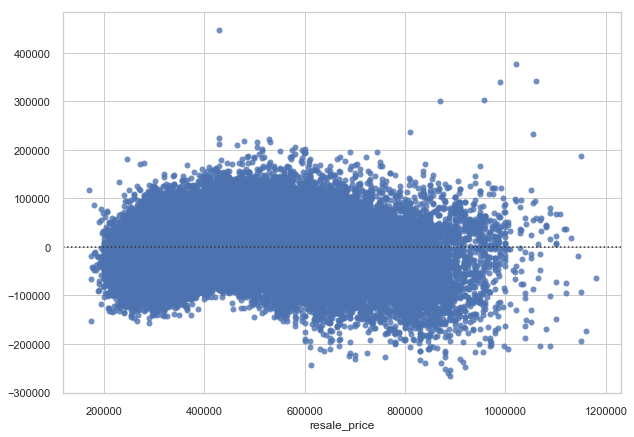

In [249]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_train, y = y_pred_lr_train);

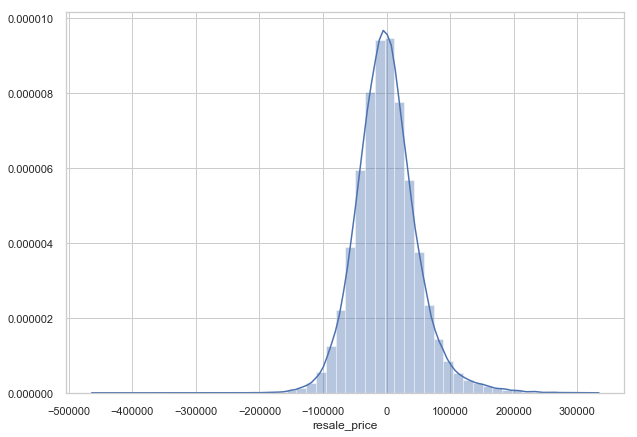

In [250]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_lr_train);

### Test Actual vs Prediction Plot

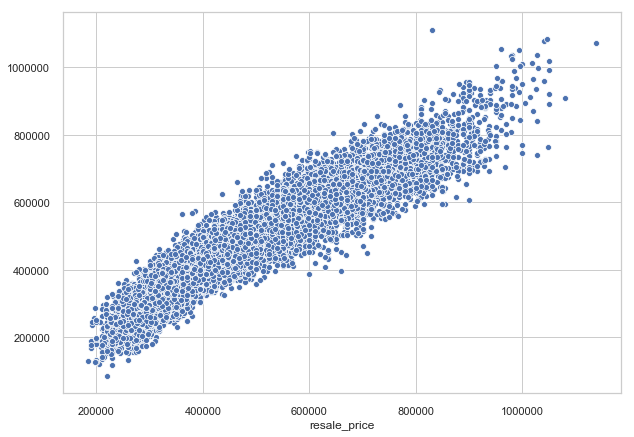

In [251]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_test, y = y_pred_lr_test);

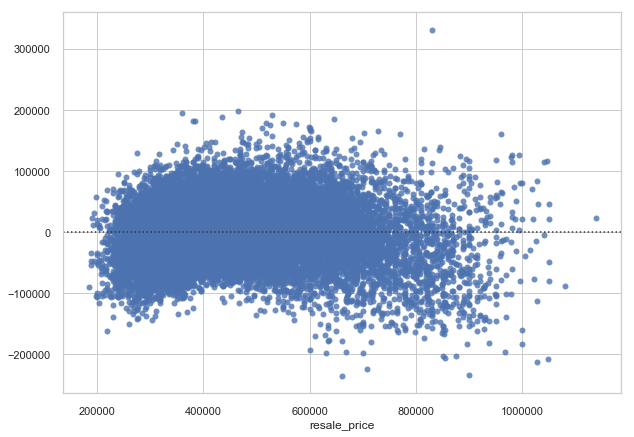

In [252]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_test, y = y_pred_lr_test);

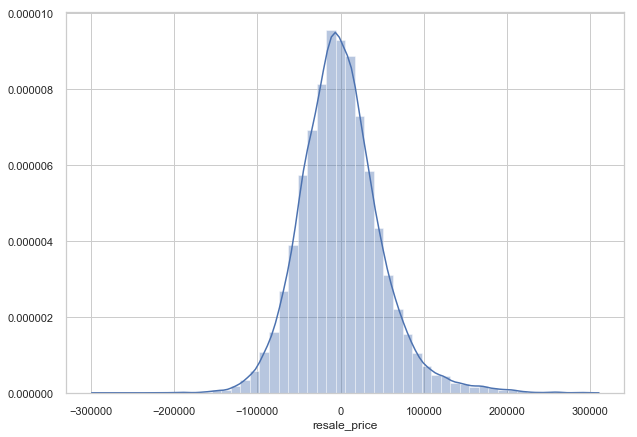

In [253]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_test-y_pred_lr_test);

In [255]:
lr_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_lr_test,2), 'actual': y_test})

lr_pred_actual.head(10)

predicted    actual
16510  286746.35  310000.0
29222  284811.28  275000.0
31859  451357.73  475000.0
3599   479903.14  505800.0
3804   370341.99  446500.0
11355  471144.39  438000.0
13802  325684.90  320000.0
4732   519599.89  460000.0
11507  788981.60  712000.0
26443  627867.93  685000.0

## Lasso Regression

In [256]:
# # Fitting Lasso Regression to the Training set
# lasso_reg = Lasso()
# param_grid = {'alpha':np.logspace(-15,2,10)}
# lasso = RandomizedSearchCV(lasso_reg,param_grid,scoring="neg_mean_squared_error",cv=5,refit=True)
# lasso.fit(X_train,y_train)

KeyboardInterrupt: 

In [265]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [266]:
# print(lasso.best_params_)
# print(lasso.best_score_)

In [267]:
# Save to file 
pkl_filename = "lasso_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lasso, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [268]:
# Predicting the Train and Test set results
y_pred_lasso_train= lasso.predict(X_train)
y_pred_lasso_test= lasso.predict(X_test)

In [269]:
#Score of Prediction
lasso_r2score_train = lasso.score(X_train,y_train)
print("Train Prediction R2 Score",lasso_r2score_train*100)
lasso_r2score_test = r2_score(y_test,y_pred_lasso_test)
print("Test Prediction R2 Score",lasso_r2score_test*100)

lasso_score_train_rmse = rmse(y_train,y_pred_lasso_train)
print("Train Prediction RMSE Score",lasso_score_train_rmse)
lasso_score_test_rmse = rmse(y_test,y_pred_lasso_test)
print("Test Prediction RMSE Score",lasso_score_test_rmse)

lasso_score_train_mape = mape(y_train,y_pred_lasso_train)
print("Train Prediction MAPE Score",lasso_score_train_mape)
lasso_score_test_mape = mape(y_test,y_pred_lasso_test)
print("Test Prediction MAPE Score",lasso_score_test_mape)

lasso_score_train_rmsle = rmsle(y_train,y_pred_lasso_train)
print("Train Prediction RMSLE Score",lasso_score_train_rmsle)
lasso_score_test_rmsle = rmsle(y_test,y_pred_lasso_test)
print("Test Prediction RMSLE Score",lasso_score_test_rmsle)

Train Prediction R2 Score 87.36689412467523
Test Prediction R2 Score 87.34450646030399
Train Prediction RMSE Score 48206.76897356504
Test Prediction RMSE Score 48415.117381167474
Train Prediction MAPE Score 8.26201795323934
Test Prediction MAPE Score 8.345841716304514
Train Prediction RMSLE Score 0.10696628118395173
Test Prediction RMSLE Score 0.10755791277463617


### Train Actual vs Prediction Plot

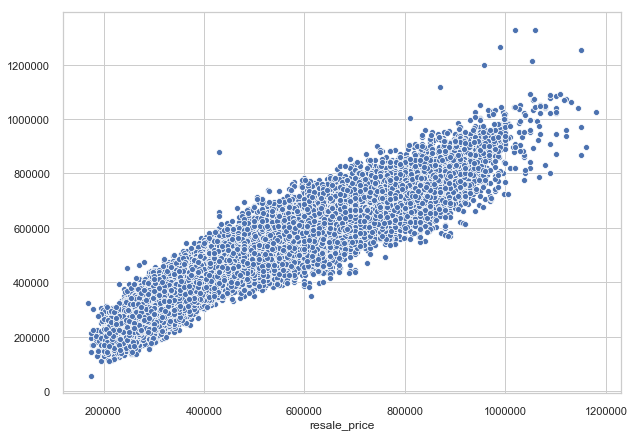

In [270]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_train, y = y_pred_lasso_train);

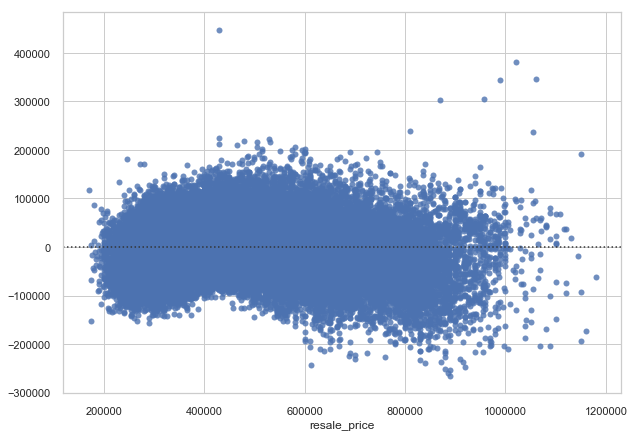

In [271]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_train, y = y_pred_lasso_train);

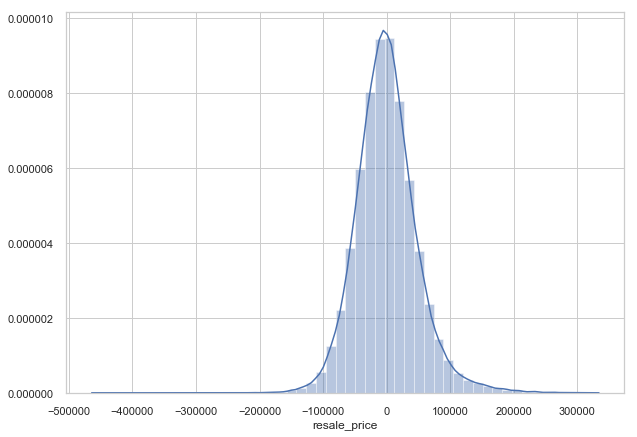

In [272]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_lasso_train);

### Test Actual vs Prediction Plot

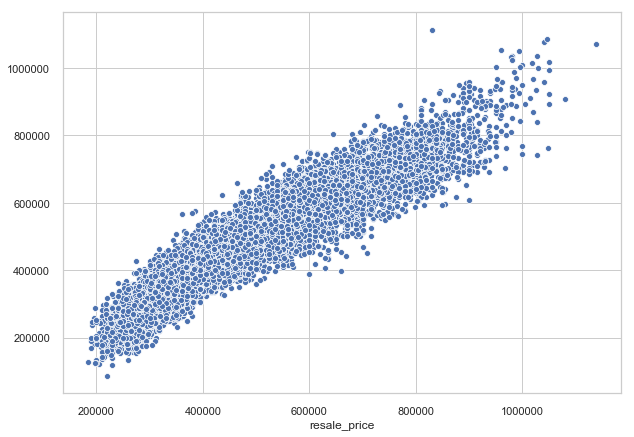

In [273]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_test, y = y_pred_lasso_test);

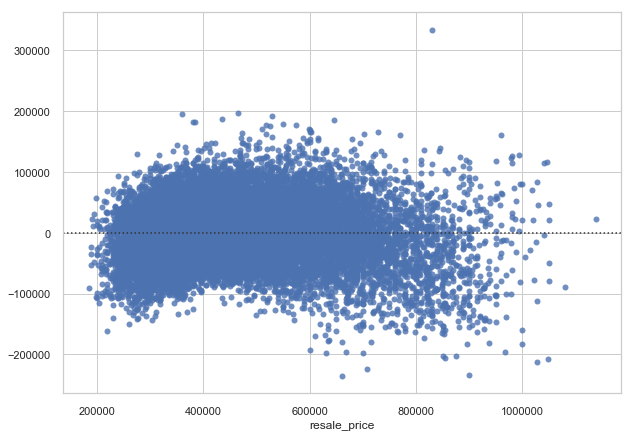

In [274]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_test, y = y_pred_lasso_test);

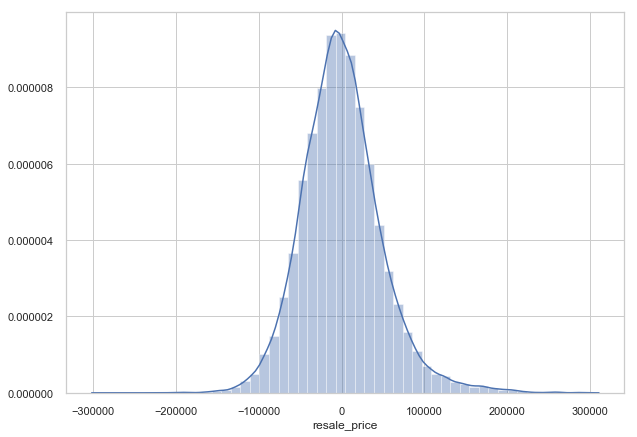

In [275]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_test-y_pred_lasso_test);

In [277]:
lasso_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_lasso_test,2), 'actual': y_test})

lasso_pred_actual.head(10)

predicted    actual
16510  286809.07  310000.0
29222  284809.07  275000.0
31859  451398.65  475000.0
3599   479984.34  505800.0
3804   370309.81  446500.0
11355  471287.10  438000.0
13802  325666.69  320000.0
4732   519739.79  460000.0
11507  788902.60  712000.0
26443  627485.58  685000.0

## Ridge Regression

In [62]:
# ridge_reg = Ridge(normalize=True)
# param_grid = {'alpha':np.logspace(-15,2,10)}
# ridge = RandomizedSearchCV(ridge_reg,param_grid,scoring="neg_mean_squared_error",cv=5,refit=True)
# ridge.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=True,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': array([1.00000000e-15, 7.74263683e-14, 5.99484250e-12, 4.64158883e-10,
       3.59381366e-08, 2.78255940e-06, 2.15443469e-04, 1.66810054e-02,
       1.29154967e+00, 1.00000000e+02])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [278]:
ridge=Ridge(alpha=0.5,normalize=True)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [279]:
# print(ridge.best_params_)
# print(ridge.best_score_)

In [280]:
# Save to file 
pkl_filename = "ridge_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(ridge, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [281]:
# Predicting the Train and Test set results
y_pred_ridge_train= ridge.predict(X_train)
y_pred_ridge_test= ridge.predict(X_test)

In [282]:
#Score of Prediction
ridge_r2score_train = ridge.score(X_train,y_train)
print("Train Prediction R2 Score",ridge_r2score_train*100)
ridge_r2score_test = r2_score(y_test,y_pred_ridge_test)
print("Test Prediction R2 Score",ridge_r2score_test*100)

ridge_score_train_rmse = rmse(y_train,y_pred_ridge_train)
print("Train Prediction RMSE Score",ridge_score_train_rmse)
ridge_score_test_rmse = rmse(y_test,y_pred_ridge_test)
print("Test Prediction RMSE Score",ridge_score_test_rmse)

ridge_score_train_mape = mape(y_train,y_pred_ridge_train)
print("Train Prediction MAPE Score",ridge_score_train_mape)
ridge_score_test_mape = mape(y_test,y_pred_ridge_test)
print("Test Prediction MAPE Score",ridge_score_test_mape)

ridge_score_train_rmsle = rmsle(y_train,y_pred_ridge_train)
print("Train Prediction RMSLE Score",ridge_score_train_rmsle)
ridge_score_test_rmsle = rmsle(y_test,y_pred_ridge_test)
print("Test Prediction RMSLE Score",ridge_score_test_rmsle)

Train Prediction R2 Score 80.24268263636039
Test Prediction R2 Score 79.9371002167036
Train Prediction RMSE Score 60286.06593908121
Test Prediction RMSE Score 60959.065096887265
Train Prediction MAPE Score 9.756380637613804
Test Prediction MAPE Score 9.906452006973325
Train Prediction RMSLE Score 0.12280453636546393
Test Prediction RMSLE Score 0.12443836376872347


### Train Actual vs Prediction Plot

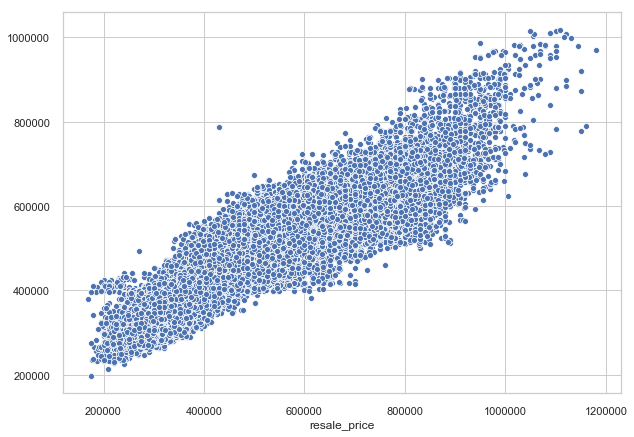

In [283]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_train, y = y_pred_ridge_train);

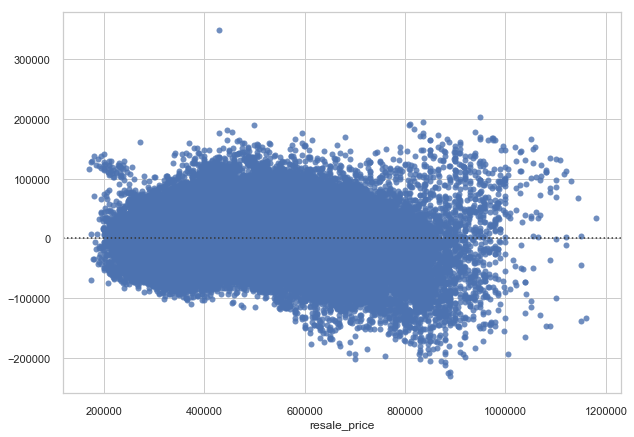

In [284]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_train, y = y_pred_ridge_train);

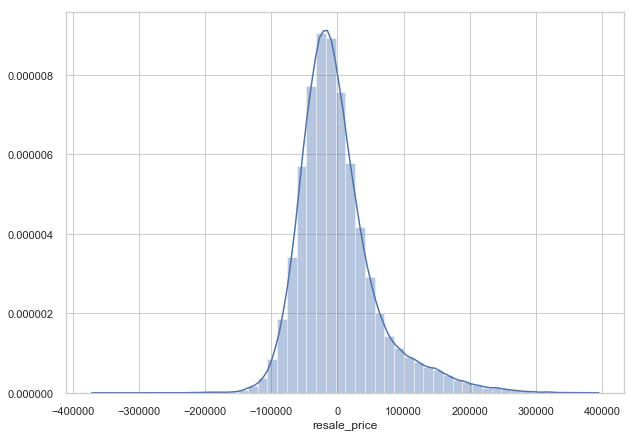

In [285]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_ridge_train);

### Test Actual vs Prediction Plot

In [286]:
# plt.figure(figsize = (20,10))
# plt.plot(y_pred_ridge_test, label='Predicted')
# plt.plot(y_test.values, label='Actual')
# plt.ylabel('Target')
# plt.legend()
# plt.show()

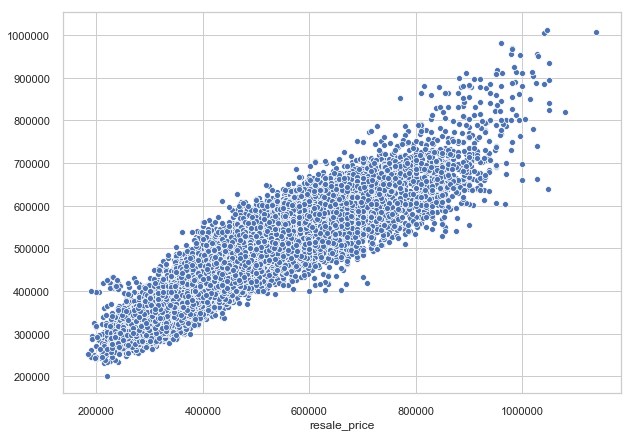

In [287]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_test, y = y_pred_ridge_test);

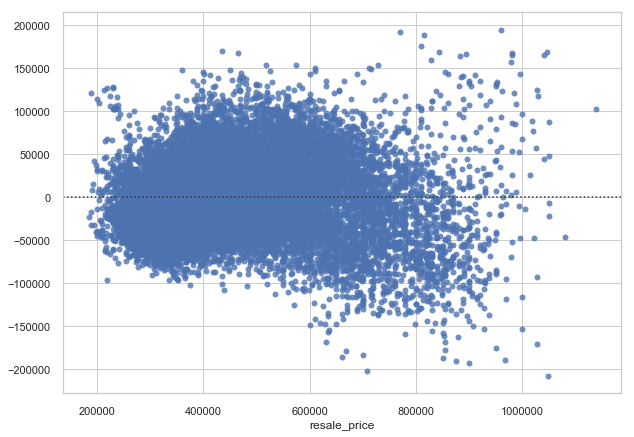

In [288]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_test, y = y_pred_ridge_test);

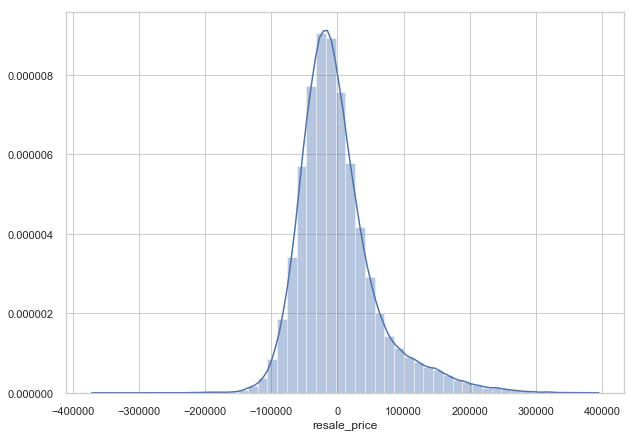

In [289]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_ridge_train);

In [290]:
ridge_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_ridge_test,2), 'actual': y_test})

ridge_pred_actual.head(10)

predicted    actual
16510  331604.95  310000.0
29222  320658.69  275000.0
31859  473797.63  475000.0
3599   473178.00  505800.0
3804   401683.96  446500.0
11355  458210.97  438000.0
13802  381373.91  320000.0
4732   505237.64  460000.0
11507  774141.65  712000.0
26443  578688.05  685000.0

## Elastic Net Regression

In [ ]:
# # Fitting ElasticNet Regression to the Training set
# elasticnet_reg=ElasticNet()
# param_grid = {'alpha':np.logspace(-4,4,10)}
# elasticnet = RandomCV(elasticnet_reg,param_grid,scoring="neg_mean_squared_log_error",cv=5,refit=True)
# elasticnet.fit(X_train,y_train)

In [296]:
# Fitting ElasticNet Regression to the Training set
elasticnet= ElasticNet(alpha=1, l1_ratio=0.9, 
                       normalize=False, max_iter=100000, warm_start=True)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=True)

In [297]:
# print(elasticnet.best_params_)
# print(elasticnet.best_score_)

In [298]:
# Save to file 
pkl_filename = "elasticnet_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(elasticnet, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [299]:
# Predicting the Train and Test set results
y_pred_elasticnet_train= elasticnet.predict(X_train)
y_pred_elasticnet_test= elasticnet.predict(X_test)

In [300]:
#Score of Prediction
elasticnet_r2score_train = elasticnet.score(X_train,y_train)
print("Train Prediction R2 Score",elasticnet_r2score_train*100)
elasticnet_r2score_test = r2_score(y_test,y_pred_elasticnet_test)
print("Test Prediction R2 Score",elasticnet_r2score_test*100)

elasticnet_score_train_rmse = rmse(y_train,y_pred_elasticnet_train)
print("Train Prediction RMSE Score",elasticnet_score_train_rmse)
elasticnet_score_test_rmse = rmse(y_test,y_pred_elasticnet_test)
print("Test Prediction RMSE Score",elasticnet_score_test_rmse)

elasticnet_score_train_mape = mape(y_train,y_pred_elasticnet_train)
print("Train Prediction MAPE Score",elasticnet_score_train_mape)
elasticnet_score_test_mape = mape(y_test,y_pred_elasticnet_test)
print("Test Prediction MAPE Score",elasticnet_score_test_mape)

elasticnet_score_train_rmsle = rmsle(y_train,y_pred_elasticnet_train)
print("Train Prediction RMSLE Score",elasticnet_score_train_rmsle)
elasticnet_score_test_rmsle = rmsle(y_test,y_pred_elasticnet_test)
print("Test Prediction RMSLE Score",elasticnet_score_test_rmsle)

Train Prediction R2 Score 64.56025333342951
Test Prediction R2 Score 64.47750975398718
Train Prediction RMSE Score 80741.7690580572
Test Prediction RMSE Score 81113.50119040423
Train Prediction MAPE Score 12.30595413987577
Test Prediction MAPE Score 12.369935820098354
Train Prediction RMSLE Score 0.15733158710507628
Test Prediction RMSLE Score 0.15821723023593576


### Train Actual vs Prediction Plot

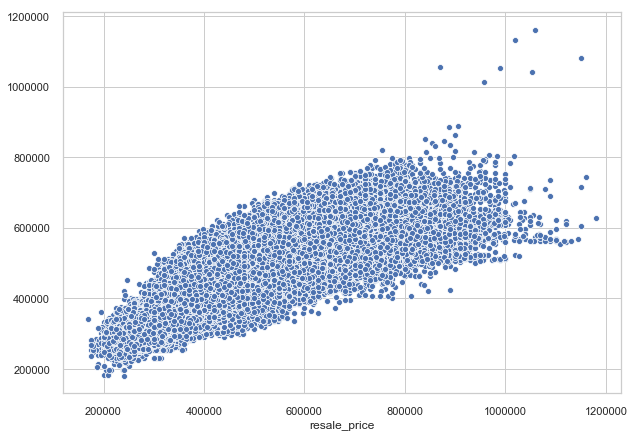

In [301]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_train, y = y_pred_elasticnet_train);

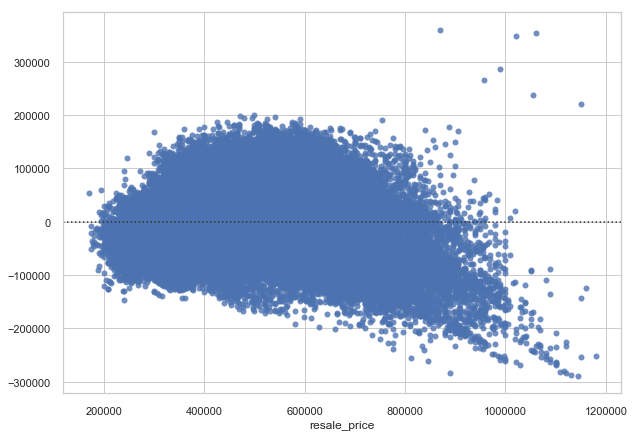

In [302]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_train, y = y_pred_elasticnet_train);

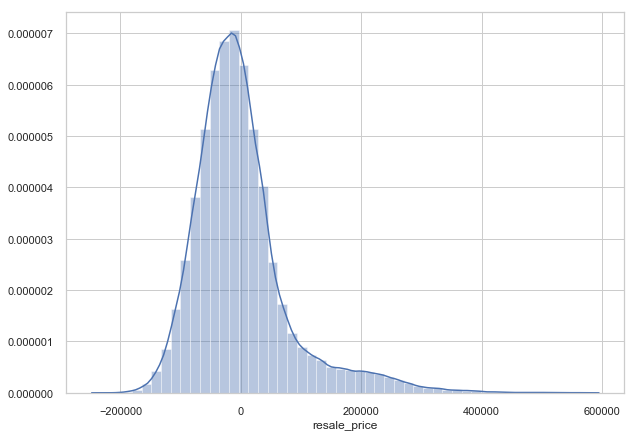

In [303]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_elasticnet_train);

### Test Actual vs Prediction Plot

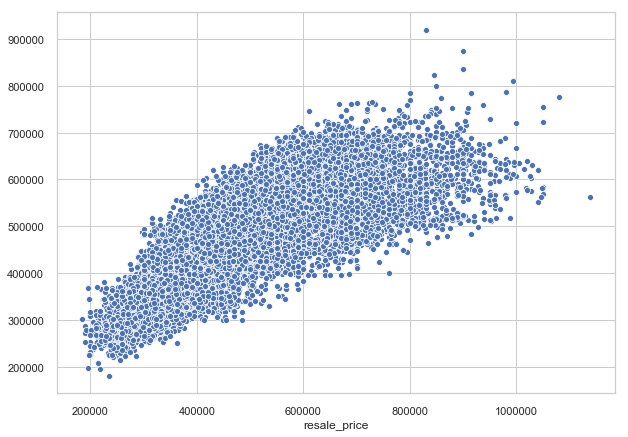

In [304]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_test, y = y_pred_elasticnet_test);

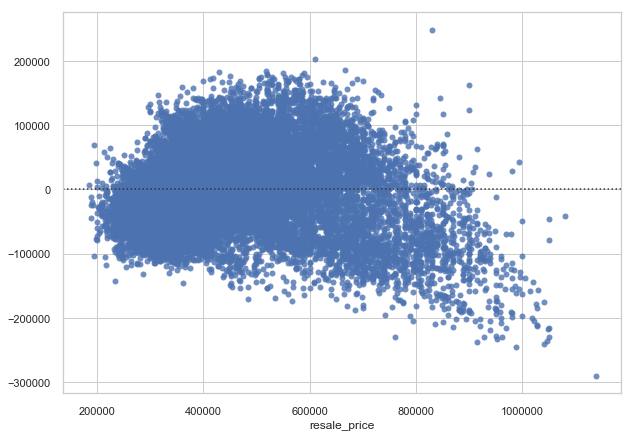

In [305]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_test, y = y_pred_elasticnet_test);

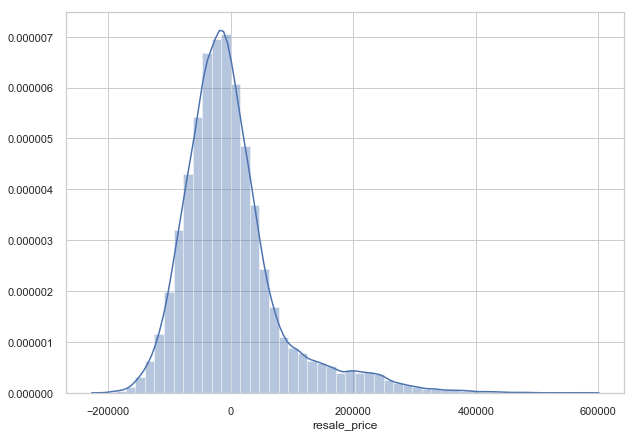

In [306]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_test-y_pred_elasticnet_test);

In [307]:
elasticnet_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_elasticnet_test), 'actual': y_test})

elasticnet_pred_actual.head(10)

predicted    actual
16510   360355.0  310000.0
29222   335097.0  275000.0
31859   492480.0  475000.0
3599    410785.0  505800.0
3804    406763.0  446500.0
11355   459511.0  438000.0
13802   448921.0  320000.0
4732    451916.0  460000.0
11507   523479.0  712000.0
26443   490401.0  685000.0

##  KNN

In [324]:
# Fitting KNN to the Training set
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [325]:
# Save to file 
pkl_filename = "knn_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [326]:
# Predicting the Train and Test set results
y_pred_knn_train= knn.predict(X_train)
y_pred_knn_test= knn.predict(X_test)

In [327]:
#Score of Prediction
knn_r2score_train = knn.score(X_train,y_train)
print("Train Prediction R2 Score",knn_r2score_train*100)
knn_r2score_test = r2_score(y_test,y_pred_knn_test)
print("Test Prediction R2 Score",knn_r2score_test*100)

knn_score_train_rmse = rmse(y_train,y_pred_knn_train)
print("Train Prediction RMSE Score",knn_score_train_rmse)
knn_score_test_rmse = rmse(y_test,y_pred_knn_test)
print("Test Prediction RMSE Score",knn_score_test_rmse)

knn_score_train_mape = mape(y_train,y_pred_knn_train)
print("Train Prediction MAPE Score",knn_score_train_mape)
knn_score_test_mape = mape(y_test,y_pred_knn_test)
print("Test Prediction MAPE Score",knn_score_test_mape)

knn_score_train_rmsle = rmsle(y_train,y_pred_knn_train)
print("Train Prediction RMSLE Score",knn_score_train_rmsle)
knn_score_test_rmsle = rmsle(y_test,y_pred_knn_test)
print("Test Prediction RMSLE Score",knn_score_test_rmsle)

Train Prediction R2 Score 95.81784642741455
Test Prediction R2 Score 91.09987913097834
Train Prediction RMSE Score 27736.58218264364
Test Prediction RMSE Score 40601.24941280371
Train Prediction MAPE Score 4.765370398292265
Test Prediction MAPE Score 7.024633204945243
Train Prediction RMSLE Score 0.062281548211457434
Test Prediction RMSLE Score 0.09113194849439803


### Train Actual vs Prediction Plot

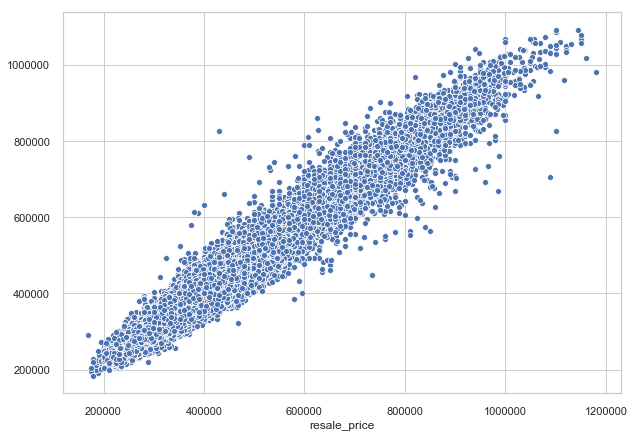

In [328]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_train, y = y_pred_knn_train);

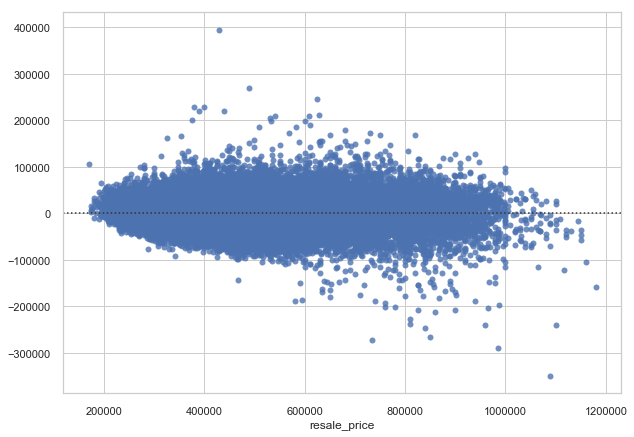

In [329]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_train, y = y_pred_knn_train);

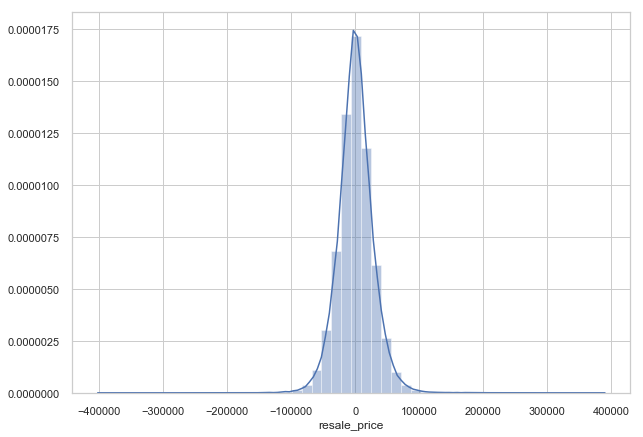

In [330]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_knn_train);

### Test Actual vs Prediction Plot

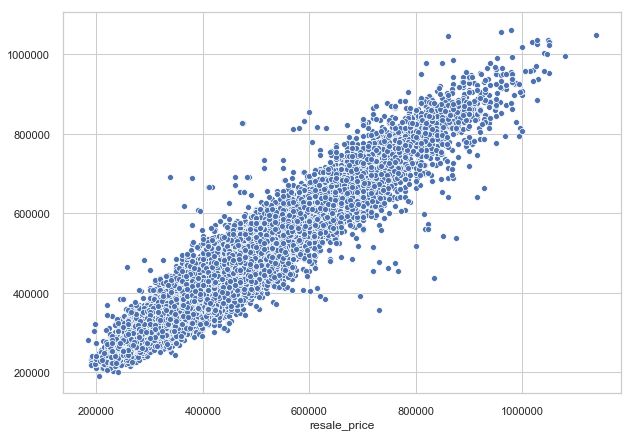

In [332]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_test, y = y_pred_knn_test);

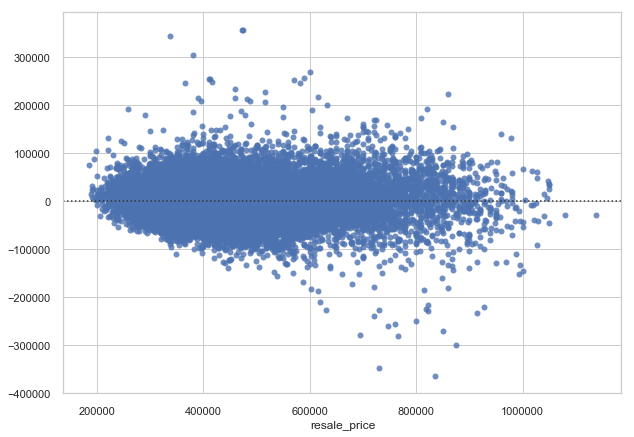

In [333]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_test, y = y_pred_knn_test);

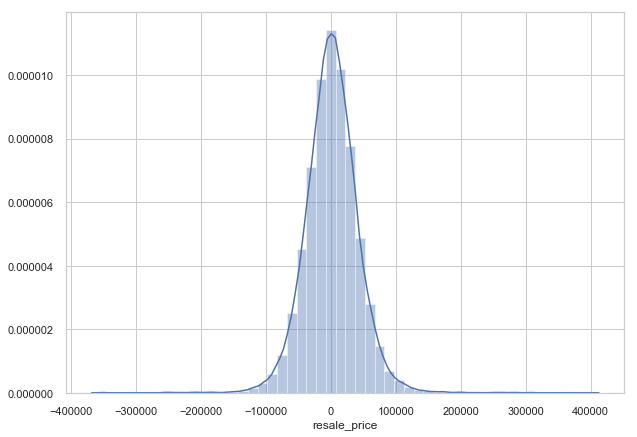

In [334]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_test-y_pred_knn_test);

In [335]:
knn_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_knn_test,2), 'actual': y_test})

knn_pred_actual.head(10)

predicted    actual
16510  282000.00  310000.0
29222  303666.67  275000.0
31859  488000.00  475000.0
3599   496666.67  505800.0
3804   422666.67  446500.0
11355  428666.67  438000.0
13802  370333.33  320000.0
4732   458666.67  460000.0
11507  674333.33  712000.0
26443  565000.00  685000.0

## SGDRegressor

In [340]:
# Fitting SGDRegressor to the Training set
sgdr = SGDRegressor(random_state = 42)
sgdr.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [341]:
# Save to file 
pkl_filename = "sgdr_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(sgdr, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [342]:
# Predicting the Train and Test set results
y_pred_sgdr_train= sgdr.predict(X_train)
y_pred_sgdr_test= sgdr.predict(X_test)

In [343]:
#Score of Prediction
sgdr_r2score_train = sgdr.score(X_train,y_train)
print("Train Prediction R2 Score",sgdr_r2score_train*100)
sgdr_r2score_test = r2_score(y_test,y_pred_sgdr_test)
print("Test Prediction R2 Score",sgdr_r2score_test*100)

sgdr_score_train_rmse = rmse(y_train,y_pred_sgdr_train)
print("Train Prediction RMSE Score",sgdr_score_train_rmse)
sgdr_score_test_rmse = rmse(y_test,y_pred_sgdr_test)
print("Test Prediction RMSE Score",sgdr_score_test_rmse)

sgdr_score_train_mape = mape(y_train,y_pred_sgdr_train)
print("Train Prediction MAPE Score",sgdr_score_train_mape)
sgdr_score_test_mape = mape(y_test,y_pred_sgdr_test)
print("Test Prediction MAPE Score",sgdr_score_test_mape)

sgdr_score_train_rmsle = rmsle(y_train,y_pred_sgdr_train)
print("Train Prediction RMSLE Score",sgdr_score_train_rmsle)
sgdr_score_test_rmsle = rmsle(y_test,y_pred_sgdr_test)
print("Test Prediction RMSLE Score",sgdr_score_test_rmsle)

Train Prediction R2 Score -7.626664692117155e+19
Test Prediction R2 Score -7.560264168244534e+19
Train Prediction RMSE Score 118445968310515.0
Test Prediction RMSE Score 118334105230821.19
Train Prediction MAPE Score 25256223087.506126
Test Prediction MAPE Score 25249537503.937363
Train Prediction RMSLE Score 19.146205999425927
Test Prediction RMSLE Score 19.144465280479714


### Train Actual vs Prediction Plot

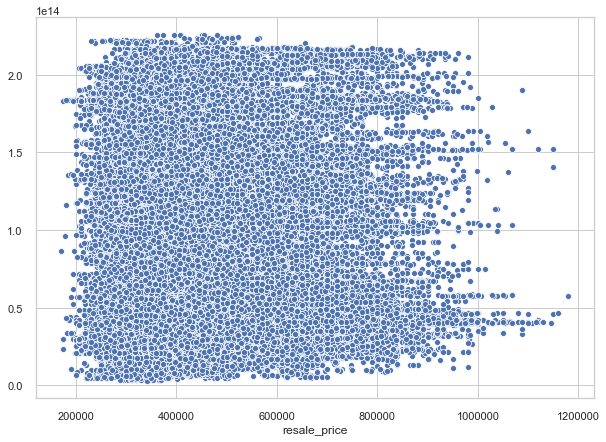

In [344]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_train, y = y_pred_sgdr_train);

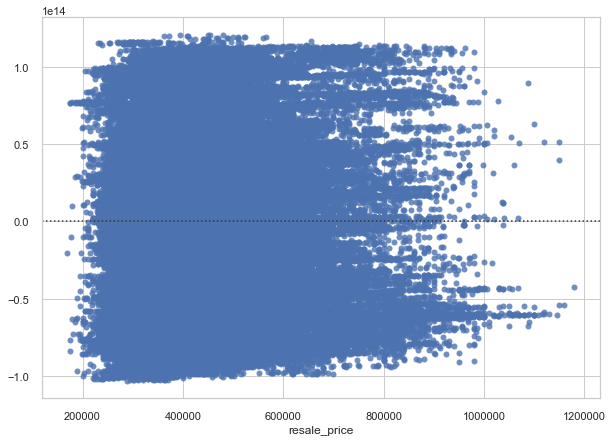

In [345]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_train, y = y_pred_sgdr_train);

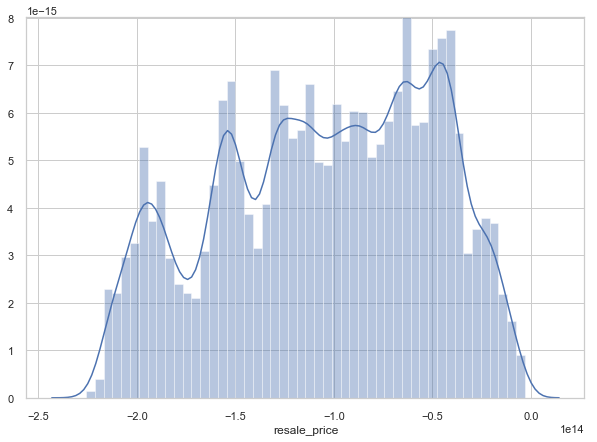

In [346]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_sgdr_train);

### Test Actual vs Prediction Plot

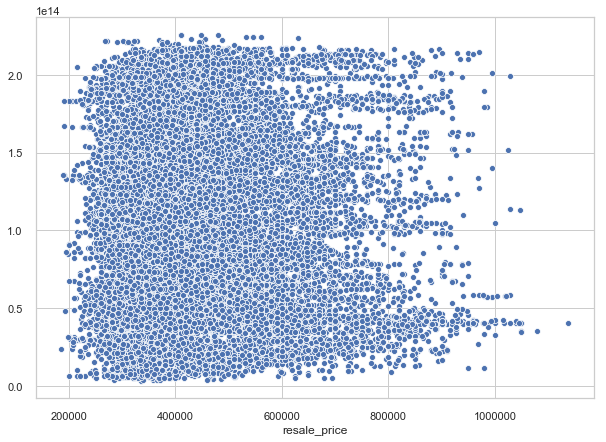

In [348]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_test, y = y_pred_sgdr_test);

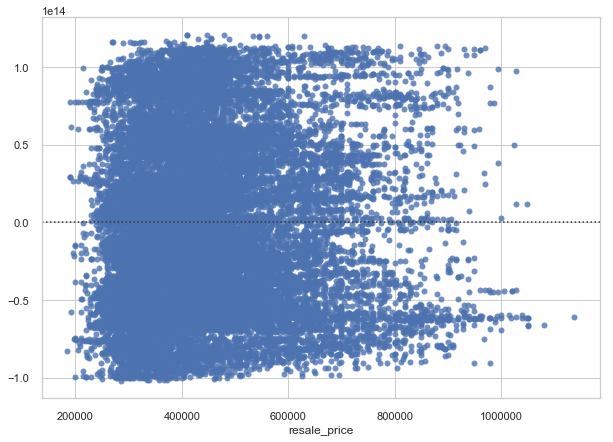

In [349]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_test, y = y_pred_sgdr_test);

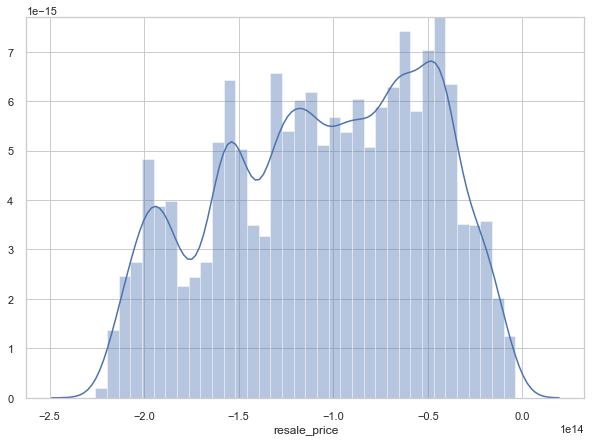

In [350]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_test-y_pred_sgdr_test);

In [351]:
sgdr_pred_actual = pd.DataFrame({'predicted': np.round(y_pred_sgdr_test), 'actual': y_test})

sgdr_pred_actual.head(10)

predicted    actual
16510  1.069432e+14  310000.0
29222  8.270194e+13  275000.0
31859  7.092204e+13  475000.0
3599   6.584395e+13  505800.0
3804   1.033866e+14  446500.0
11355  1.426018e+14  438000.0
13802  4.627436e+13  320000.0
4732   5.120329e+13  460000.0
11507  1.180556e+14  712000.0
26443  5.135006e+13  685000.0

## Simple Decision Tree

In [352]:
# Fitting DecisionTree to the Training set
dt_s = DecisionTreeRegressor()
dt_s.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [353]:
# Save to file 
pkl_filename = "dt_s_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(dt_s, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [354]:
# Predicting the Train and Test set results
y_pred_dt_s_train= dt_s.predict(X_train)
y_pred_dt_s_test= dt_s.predict(X_test)

In [355]:
#Score of Prediction
dt_s_r2score_train = dt_s.score(X_train,y_train)
print("Train Prediction R2 Score",dt_s_r2score_train*100)
dt_s_r2score_test = r2_score(y_test,y_pred_dt_s_test)
print("Test Prediction R2 Score",dt_s_r2score_test*100)

dt_s_score_train_rmse = rmse(y_train,y_pred_dt_s_train)
print("Train Prediction RMSE Score",dt_s_score_train_rmse)
dt_s_score_test_rmse = rmse(y_test,y_pred_dt_s_test)
print("Test Prediction RMSE Score",dt_s_score_test_rmse)

dt_s_score_train_mape = mape(y_train,y_pred_dt_s_train)
print("Train Prediction MAPE Score",dt_s_score_train_mape)
dt_s_score_test_mape = mape(y_test,y_pred_dt_s_test)
print("Test Prediction MAPE Score",dt_s_score_test_mape)

dt_s_score_train_rmsle = rmsle(y_train,y_pred_dt_s_train)
print("Train Prediction RMSLE Score",dt_s_score_train_rmsle)
dt_s_score_test_rmsle = rmsle(y_test,y_pred_dt_s_test)
print("Test Prediction RMSLE Score",dt_s_score_test_rmsle)

Train Prediction R2 Score 99.98311960241453
Test Prediction R2 Score 93.43151835917969
Train Prediction RMSE Score 1762.155752284265
Test Prediction RMSE Score 34879.796389822644
Train Prediction MAPE Score 0.0490701888692754
Test Prediction MAPE Score 5.513057330010144
Train Prediction RMSLE Score 0.004279663779254189
Test Prediction RMSLE Score 0.07482788671997034


In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

dot_data = graph = Source(tree.export_graphviz(dt_s, out_file=None, feature_names=X.columns,class_names='Target', filled=True, rounded=True, special_characters=True)) 
display(SVG(graph.pipe(format='svg')))
graph.format = 'png'
graph.render(filename='Regression',view=True)

In [ ]:
feat_labels = X.columns[1:]

importances = dt_s.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### Train Actual vs Prediction Plot

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_train, y = y_pred_dt_s_train);

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_train, y = y_pred_dt_s_train);

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_train-y_pred_dt_s_train);

### Test Actual vs Prediction Plot

In [ ]:
# plt.figure(figsize = (20,10))
# plt.plot(y_pred_dt_s_test, label='Predicted')
# plt.plot(y_test.values, label='Actual')
# plt.ylabel('Target')
# plt.legend()
# plt.show()

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(x = y_test, y = y_pred_dt_s_test);

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.residplot(x = y_test, y = y_pred_dt_s_test);

In [ ]:
f,ax=plt.subplots(figsize = (10,7))
sns.distplot(y_test-y_pred_dt_s_test);

In [ ]:
dt_s_pred_actual = pd.DataFrame({'predicted': y_pred_dt_s_test, 'actual': y_test})

dt_s_pred_actual.head(10)